IMPORTING ALL THE NECESSARY LIBRARIES!!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth =200

IMPORTING THE DATASET!!

In [2]:
df=pd.read_csv("census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
print(f'SHAPE OF THE DATA SET IS {df.shape}')

SHAPE OF THE DATA SET IS (32560, 15)


INFORMATION ABOUT THE DATASET!!
--------------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB



CONSISTING OF INT AND OBJECT TYPES<BR>

In [6]:
#SAGGREGATING CONTINUOUS AND CATEGORICAL DATA 
#INITIALISING EMPTY LIST TO APPEND IN THE DATAFRAME
#cont_col=[] FOR THE CONTINUOUS DATA
#cat_col=[] FOR THE CATEGORICAL DATA


In [7]:
cont_col=[]
cat_col=[]

In [8]:
for i in df:
    if(df[i].dtype=='O'):
        cat_col.append(i)
    else:
        cont_col.append(i)

In [9]:
print(f'CATEGORICAL COLUMNS ARE AS FOLLOWS \n\n\n{cat_col}')

CATEGORICAL COLUMNS ARE AS FOLLOWS 


['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [10]:
print(f'CONTINUOS COLUMNS ARE AS FOLLOWS: \n\n {cont_col}')

CONTINUOS COLUMNS ARE AS FOLLOWS: 

 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


<b>CHECKING THE UNIQUE CATEGORIES PRESENT IN CATEGORICAL COLUMNS:

In [11]:
FEAT=[]
UNI=[]
LE=[]

In [12]:
for i in cat_col:
    FEAT.append(i)
    UNI.append(df[i].unique())
    LE.append(len(df[i].unique()))

In [13]:
info=pd.DataFrame({"FEATURES":FEAT,"UNIQUE_CATEGORIES":UNI,"TOTAL UNIQUE CATEGORIES":LE})

In [14]:
info

,FEATURES,UNIQUE_CATEGORIES,TOTAL UNIQUE CATEGORIES
0,Workclass,"[ Self-emp-not-inc, Private, State-gov, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]",9
1,Education,"[ Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th]",16
2,Marital_status,"[ Married-civ-spouse, Divorced, Married-spouse-absent, Never-married, Separated, Married-AF-spouse, Widowed]",7
3,Occupation,"[ Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Adm-clerical, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protectiv...",15
4,Relationship,"[ Husband, Not-in-family, Wife, Own-child, Unmarried, Other-relative]",6
5,Race,"[ White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other]",5
6,Sex,"[ Male, Female]",2
7,Native_country,"[ United-States, Cuba, Jamaica, India, ?, Mexico, South, Puerto-Rico, Honduras, England, Canada, Germany, Iran, Philippines, Italy, Poland, Columbia, Cambodia, Thailand, Ecuador...",42
8,Income,"[ <=50K, >50K]",2


<b>ITS OBSERVED THAT COLUMNS ['workclass','native country','Occupation'] contains '?' which is a sort of null only

<b>CHECKING THE UNIQUE CATEGORIES PRESENT IN CONTINUOUS COLUMNS:

In [15]:
ff=[]
un=[]
le=[]

In [16]:
for i in ['Education_num','Hours_per_week']:
    ff.append(i)
    un.append(df[i].unique())
    le.append(len(df[i].unique()))

In [17]:
inf=pd.DataFrame({"FEATURES":ff,"UNIQUE_CATEGORIES":un,"TOTAL UNIQUE CATEGORIES":le})

In [18]:
inf

,FEATURES,UNIQUE_CATEGORIES,TOTAL UNIQUE CATEGORIES
0,Education_num,"[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8]",16
1,Hours_per_week,"[13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55, 48, 58, 32, 70, 2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65, 1, 10, 34, 75, 98, 33, 54, 8, 6, 64, 19, 18, 72, 5, 9, 47, 37, 21, 2...",94


<b> THE ABOVE TWO DATAFRAMES GIVES US INFORMATION ABOUT THE DIFFERENT CATEGORIES PRESENT IN THE COLUMNS:

DESCRIBING THE DATA
-------------------

<B> CONTINUOS COLUMNS

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


IT CAN BE OBSERVED THAT MINIMUM VALUE FOR HOURS_PER_WEEK IS 1 WHICH IS QUIET STRANGE<BR>
CAPITAL_LOSS AND CAPITAL_GAIN HAVE ABNORMAL DISTRIBUTION AS UPTO 75% OF THE DATASET IS 0 AND SUDDEN INCREASE TO MAX VALUES<BR>
AGE,EDUCATION_NUM SEEMS TO HAVE NORMAL DISTRIBUTION FURTHER WE WILL CHECK THIS USING THE PLOTS<BR>

<B> HEATMAP FOR THE DESCRRIPTION

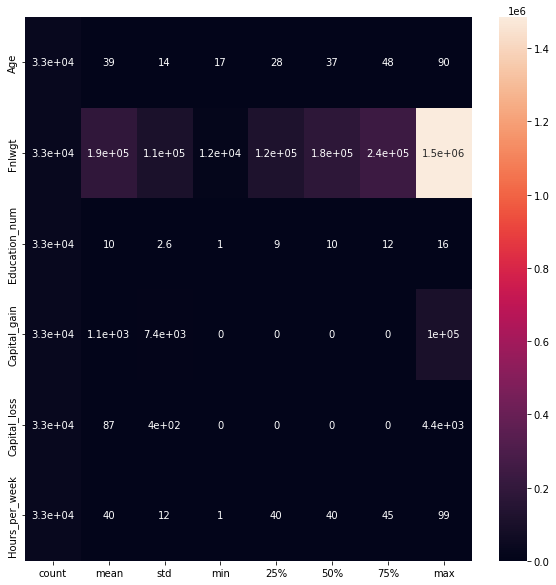

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.describe().T,annot=True,annot_kws={'size':10})
plt.show()

HEATMAP FOR BETTER VISUAL REPRESENTATIONS OF THE DESCRIPTION!!


<B> CATEGORICAL COLUMNS

In [21]:
df.describe(include='O')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


ABOVE DATASET DESCRIBES THE TOTAL UIQUE CATEGORIES,MOST FREQUENT CATEGORY(TOP),AND THE FREQUENCY

TREATING "?" IN DATASET WHICH IS A NULL ONLY!!
---------------------------

<b>checking the columns which contains "?"

In [22]:
for i in df:
    ll=df[i].unique().tolist()
    for k in ll:
        if(k==' ?'):
            print(f'? FOUND IN {i} COLUMN')
            

? FOUND IN Workclass COLUMN
? FOUND IN Occupation COLUMN
? FOUND IN Native_country COLUMN


In [23]:
df['Workclass']=np.where(df['Workclass']==' ?',np.nan,df['Workclass'])

In [24]:
df['Occupation']=np.where(df['Occupation']==' ?',np.nan,df['Occupation'])

In [25]:
df['Native_country']=np.where(df['Native_country']==' ?',np.nan,df['Native_country'])

CHECKING FOR THE NULLS!
-------------------

In [26]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<B>CLEARLY CAN BE SEEN THAT 'WORKCLASS','OCCUPATION','NATIVE_COUNTRY' HAVE NULLS!!

CORRELATION AMONG THE FEATURES 
---------------

<b>HEAT MAP

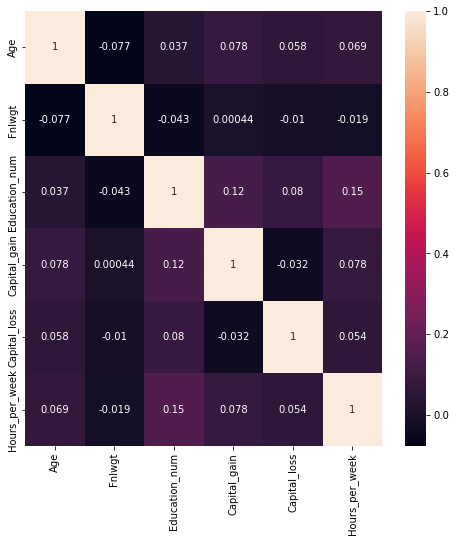

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

The above heatmap coorelates features among themselves and tells us about the relationship in numeric form<br>
Educationla_num holds a correlation of(0.15) with the hours_per_week and capital_gain holds a correlation of (0.12) with the Education_num

To have a better understanding of the Fnlwgt lets check its individual correlation with the features<br>

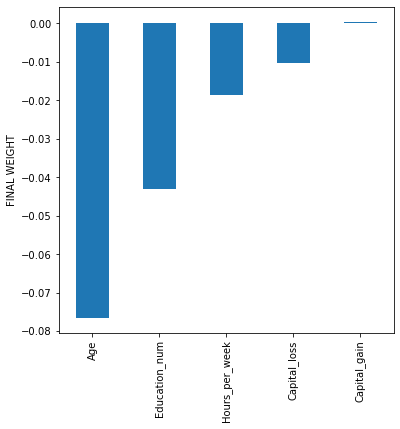

In [28]:
plt.figure(figsize=(6,6))
df.corr()['Fnlwgt'].drop(['Fnlwgt']).sort_values().plot(kind='bar')
plt.ylabel("FINAL WEIGHT")
plt.show()

Almost all of the features as in graph have a negative correlation with the feature 'Fnlwgt'<br>
With Age having a strongest negative correlation with the 'Fnlwgt'<br>


Handling the nulls USING SIMPLE IMPUTER("MOST-FREQUENT")
-------------

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
si=SimpleImputer(strategy='most_frequent')

In [31]:
for i in ['Workclass','Occupation','Native_country']:
    df[i]=si.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<B> HENCE ALL THE NULLS IMPUTED SUCCESSFULLY!!

In [33]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20)

ANALYSIS!!
------------

In [34]:
lis=df.columns.tolist()

In [35]:
lis

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

<B> AGE AS  A FACTOR INFLUENCING OTHER FACTORS AND LABEL('INCOME')!!!

CHECKING THE DITRIBUTION OF AGE!!

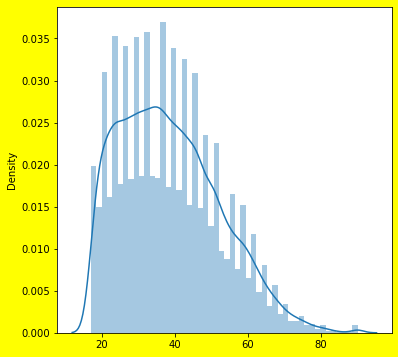

In [36]:
plt.figure(figsize=(6,6),facecolor='Yellow')
sns.distplot(x=df['Age'])
plt.show()

IT CAN BE OBSERVED THAT THE CURVE IS SKEWED TO THE RIGHT!!<BR>

In [37]:
print(f"MEAN AND STD OF THE AGE are {df['Age'].mean()} and {df['Age'].std()} ")

MEAN AND STD OF THE AGE are 38.581633906633904 and 13.640641827464046 


CHECKING HOW AGE VARIES OVER EACH WORKCLASS

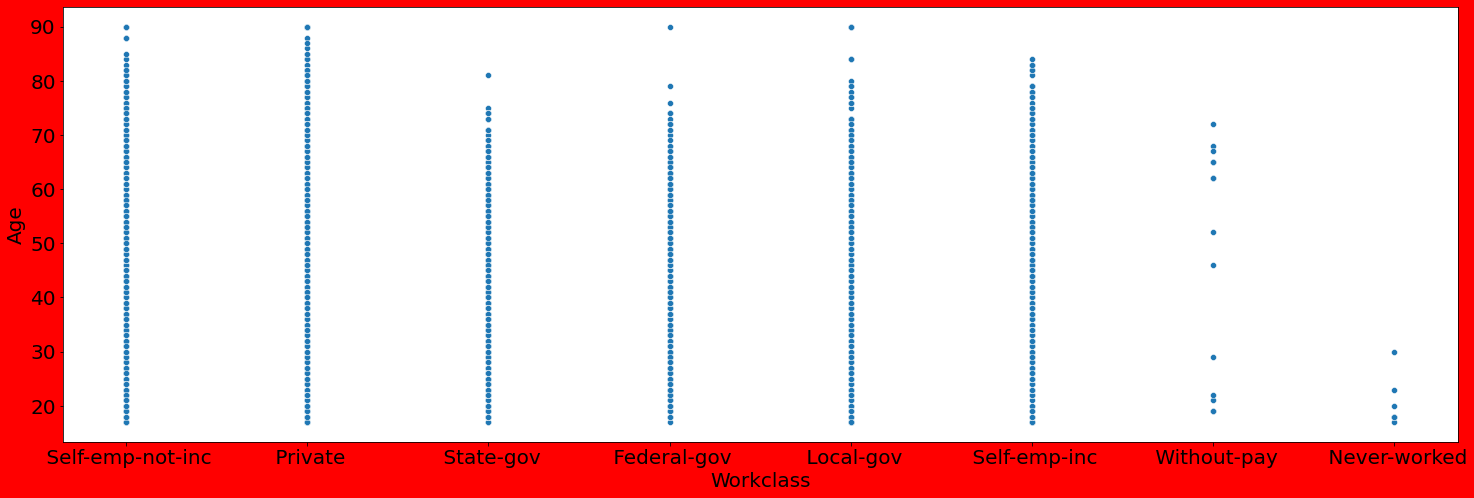

In [38]:
plt.figure(figsize=(25,8),facecolor='Red')
sns.scatterplot(x=df['Workclass'],y=df['Age'])
plt.xticks(fontsize=20)
plt.xlabel("Workclass",size=20)
plt.yticks(fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

IT CAN BE SEEN THAT THE SELF-EMPLOYED-NOT-INCORPORATED CATEGORY HAVE THE HIGHEST AGE range<br>
Those who works for the government records less working age as compared to those self-emp or works in private maybe because of government retirement policies <br>


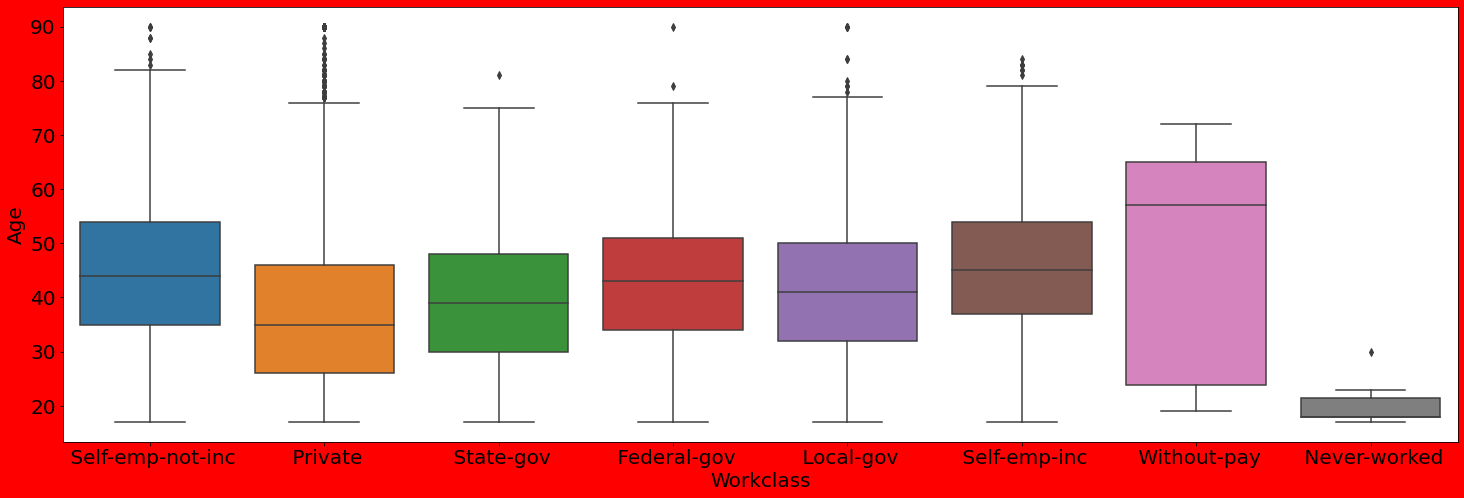

In [39]:
plt.figure(figsize=(25,8),facecolor='Red')
sns.boxplot(x=df['Workclass'],y=df['Age'])
plt.xticks(fontsize=20)
plt.xlabel("Workclass",size=20)
plt.yticks(fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

CONSIDERABLE AMOUNT OF OUTLIERS CAN BE SEEN IN SOME CATEGORIES LIKE SELFEMPLOYEED NOT INCORPORATED,PRIVATE SECTOR<BR>

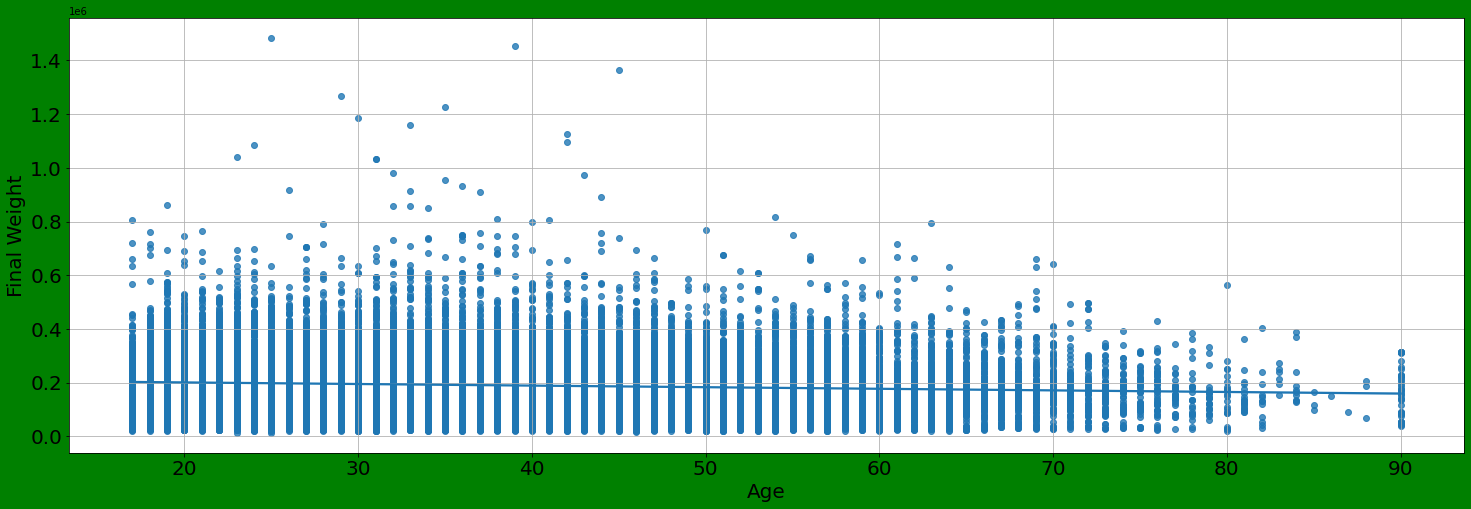

In [40]:
plt.figure(figsize=(25,8),facecolor='Green')
plt.grid(True)
sns.regplot(x=df['Age'],y=df['Fnlwgt'])
plt.xticks(fontsize=20)
plt.xlabel("Age",size=20)
plt.yticks(fontsize=20)
plt.ylabel("Final Weight",fontsize=20)
plt.show()

No significant relation can be seen between the Age and the FinalWeight <br>
Showing Age is not directly related with the Weight<br>

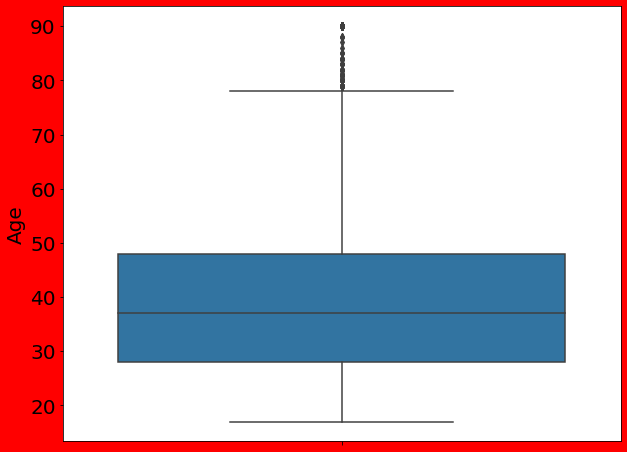

In [41]:
plt.figure(figsize=(10,8),facecolor='Red')
sns.boxplot(y=df['Age'])
plt.yticks(fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

Age though have noticable amount of outliers in it!!

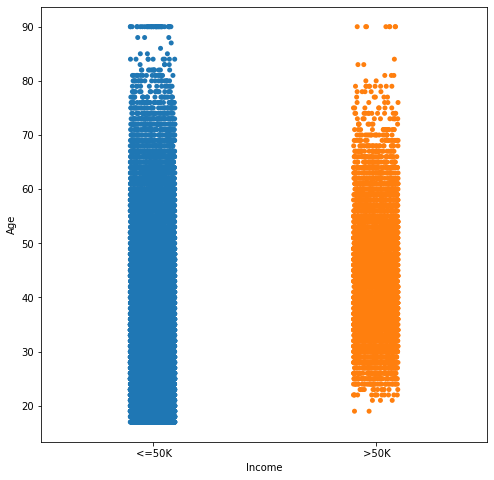

In [42]:
plt.figure(figsize=(8,8))
sns.stripplot(x=df['Income'],y=df['Age'])
plt.show()

In [43]:
ff=pd.DataFrame(df[df['Income']==' >50K']['Age'])

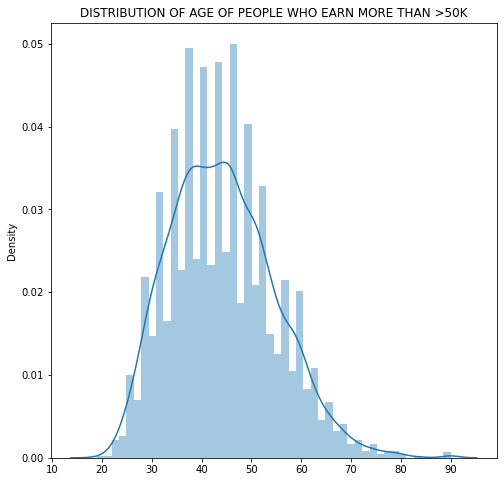

In [44]:
plt.figure(figsize=(8,8))
sns.distplot(x=ff['Age'])
plt.title("DISTRIBUTION OF AGE OF PEOPLE WHO EARN MORE THAN >50K")
plt.show()

Its quiet obvious from the plot that those who earn more that 50k lies in a slab of 30 TO 60 <BR>
IT GIVES MORE CLEARITY TO THE STRIPPLOT WE PLOTTED ABOVE TOO AS THE REGION IS MORE DENSE IN THIS ZONE<BR>

CHECKING THE DISTRIBUTION AMONG THE WORKCLASS<BR>

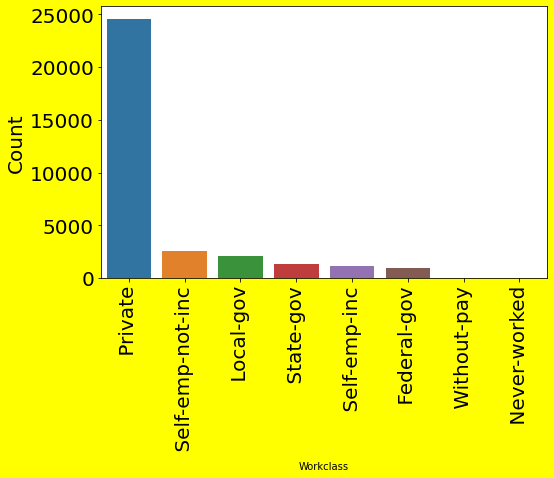

In [45]:
plt.figure(figsize=(8,5),facecolor='Yellow')
sns.countplot(x=df['Workclass'],order=df['Workclass'].value_counts().keys())
plt.yticks(fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

Most of the workers work for a private comany and having exceptionally high count.This may be becuase of good infrastructure offered to private comapnies in US and ease of getting a job in there<br>
Federal government jobs having the lowest count among the working class,might be due to less number of vacancies in there and special criterias to be fullfilled to get them limiting the people taking federal government jobs<br>
Self-employes not incorporated have greater count then self employes incorporated depicting people prefer more of NON incorporation and have the sole-propetiorship in their business


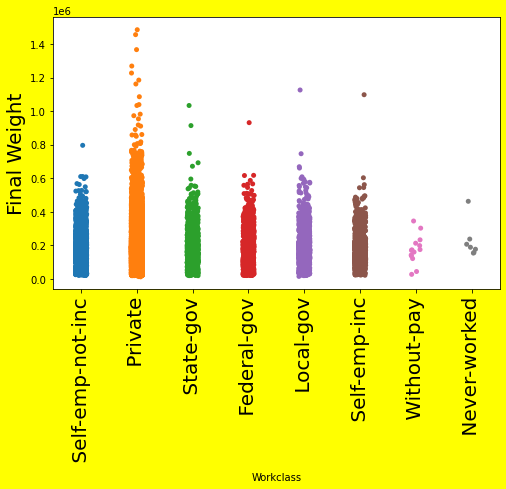

In [46]:
plt.figure(figsize=(8,5),facecolor='Yellow')
sns.stripplot(x=df['Workclass'],y=df['Fnlwgt'])
plt.ylabel("Final Weight",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

As most workforce works for the Private firms its no denying fact that they might be sharing the same Final weights giving a spike over Private firms<br>
Same pattern as we saw in countplot<br>

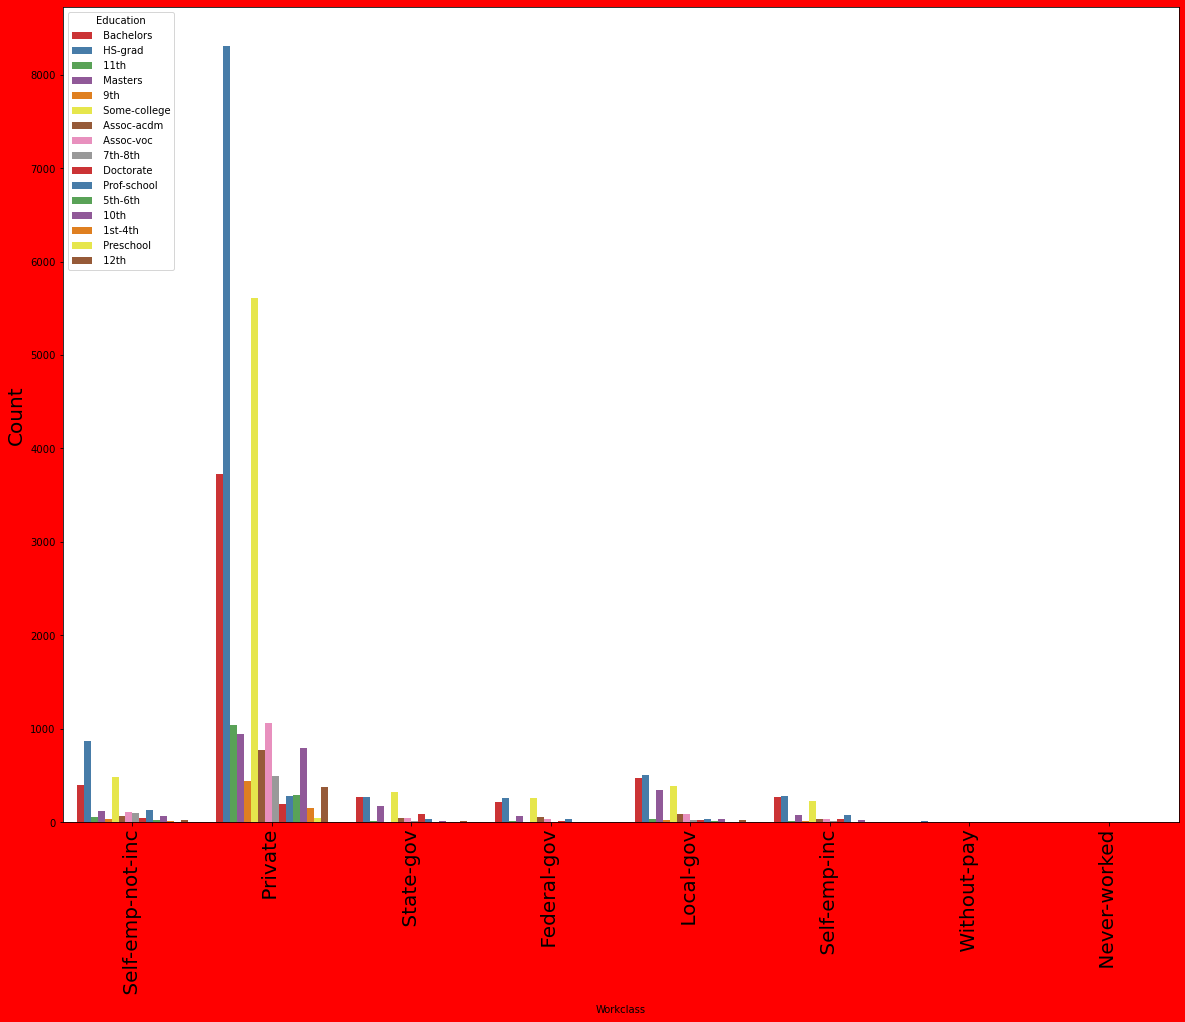

In [47]:
plt.figure(figsize=(20,15),facecolor='Red')
sns.countplot(x=df['Workclass'],hue=df['Education'],palette='Set1')
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

IT CAN BE OBSERVED THAT HighSchool grad remains the most pursued education irrespextive of any workclass category.This might be due to governent policies and help in completing the basic education which makes sure the citizen have completed basic schooling<br><br>
Edcucation from some college remains the 2nd most recieved education among all the categories<br><br>


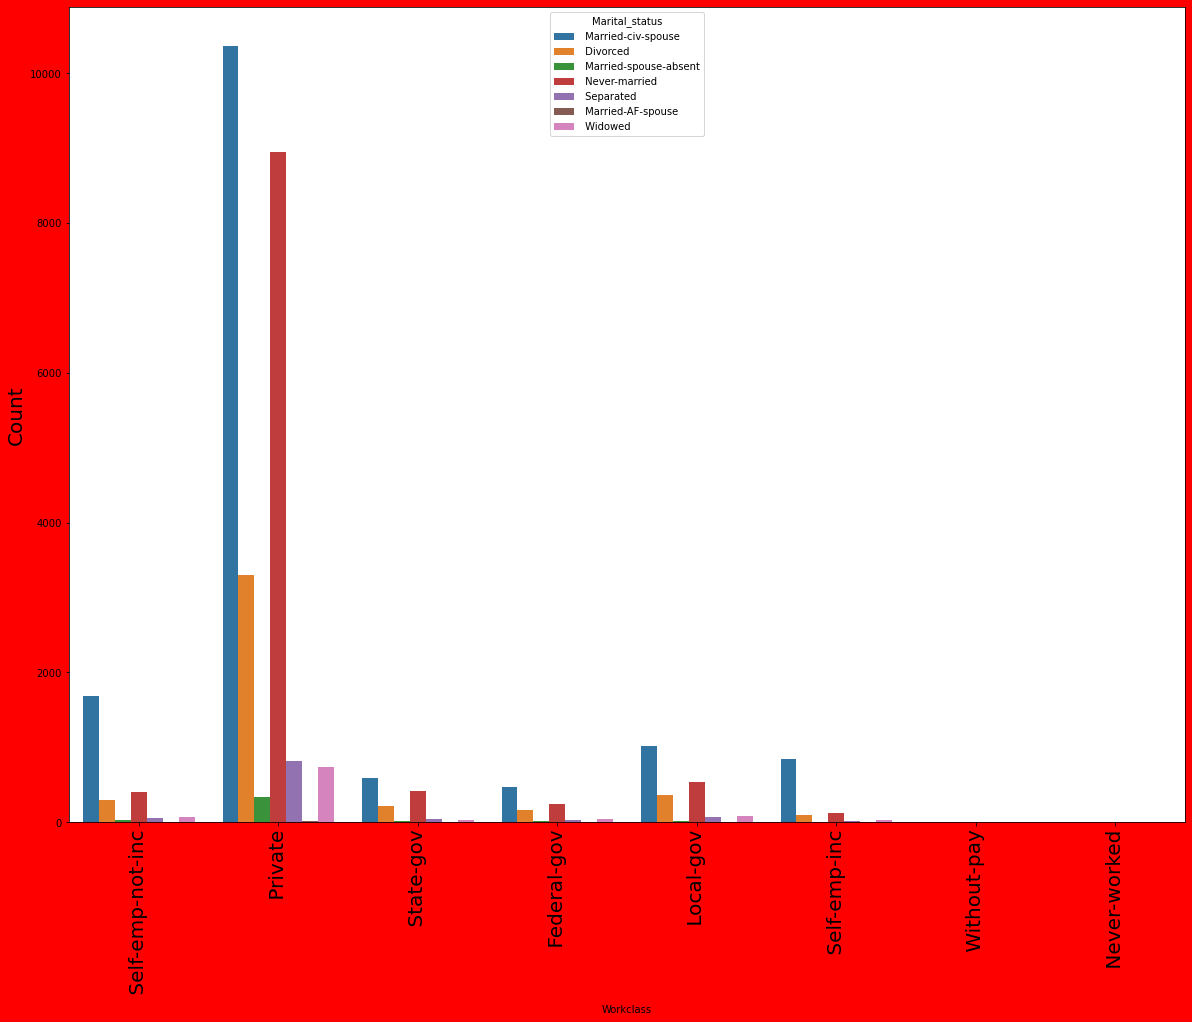

In [48]:
plt.figure(figsize=(20,15),facecolor='Red')
sns.countplot(x=df['Workclass'],hue=df['Marital_status'])
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

THE COUNT OF THOSE HAVING  A CIVILIAN WIFE is the highest among all the categories<br>
Those who are divroced are also having a significant count in private sector<br>
Married with a armed forces spouse is among the least count among the categories as the odds ae pretty less in this case<br>


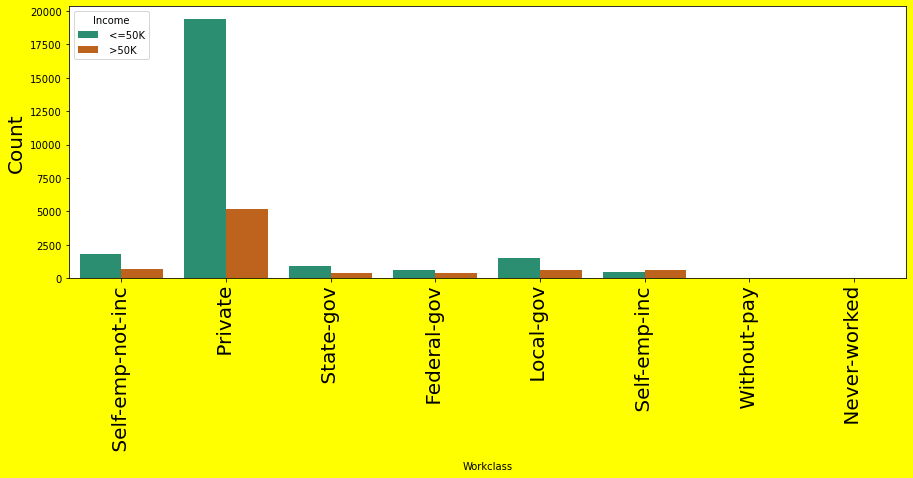

In [49]:
plt.figure(figsize=(15,5),facecolor='Yellow')
sns.countplot(x=df['Workclass'],hue=df['Income'],palette='Dark2')
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

Earning a Income >50K have more odds in Private as compared to any other field in working class<br>
Maintaining this bracket in State-gov job is quiet challenging as the ccount is too low<br>


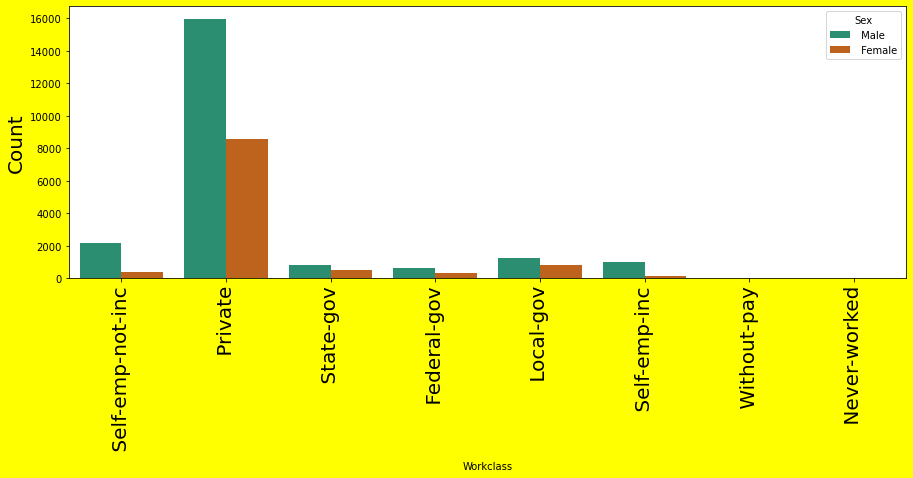

In [50]:
plt.figure(figsize=(15,5),facecolor='Yellow')
sns.countplot(x=df['Workclass'],hue=df['Sex'],palette='Dark2')
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

Male workers dominate the workforce when it comes to any CLASS we talk about<br>
Though in State-gov and Federal gov job it cna be observed that the ratio is meaintained almost same maybe because of the government policies and women empowerment steps taken by the government<bt>


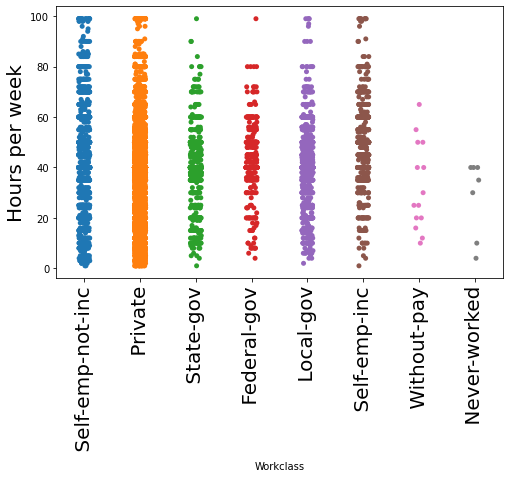

In [51]:
plt.figure(figsize=(8,5))
sns.stripplot(x=df['Workclass'],y=df['Hours_per_week'])
plt.ylabel("Hours per week",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

It can be inferred from the above plot that Private employees have a uniform and alike distribution of the working hours per week obviously because of the company policies <br>
A relaxation in working hours  can be seen among  state and federal govt employees as compared to private employees<br>

In [52]:
wd=df.groupby(['Workclass']).mean()

In [53]:
wd['Workclass']=wd.index

In [54]:
wd

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass
Workclass,,,,,,,
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167,Federal-gov
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800,Local-gov
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571,Never-worked
Private,37.109123,192446.206791,9.833361,868.081037,78.568156,39.642345,Private
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100,Self-emp-inc
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881,Self-emp-not-inc
State-gov,39.436392,184218.818813,11.374711,700.564379,83.320740,39.030840,State-gov
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286,Without-pay


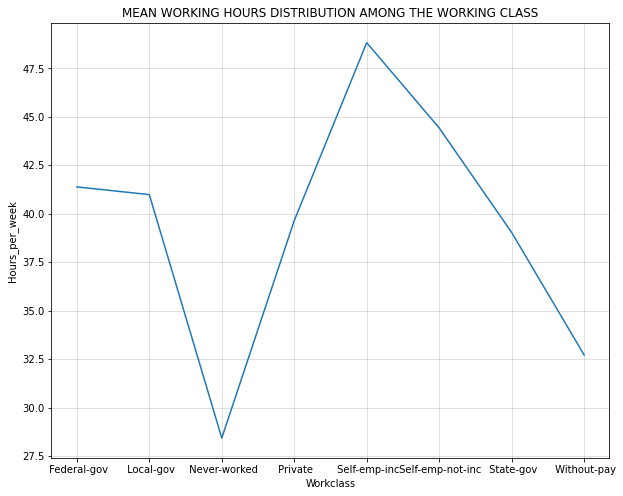

In [55]:
plt.figure(figsize=(10,8))
plt.grid(True,alpha=0.5)
sns.lineplot(x=wd['Workclass'],y=wd['Hours_per_week'])
plt.title("MEAN WORKING HOURS DISTRIBUTION AMONG THE WORKING CLASS")
plt.show()

Above plot clearly shows the trend in mean working hours among the working class <br>
Those who work  as Self-employes-incorporated business are among the highest working hours per week <br>
Also state gov employees have less mean woking hours as compared to federal and local government<br>


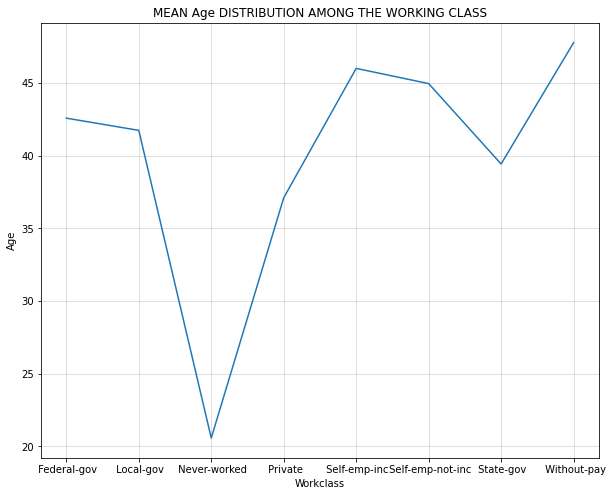

In [56]:
plt.figure(figsize=(10,8))
plt.grid(True,alpha=0.5)
sns.lineplot(x=wd['Workclass'],y=wd['Age'])
plt.title("MEAN Age DISTRIBUTION AMONG THE WORKING CLASS")
plt.show()

Those who work as self_employed-incorporation business have the highest mean working age marked <br>
Federal government and state government also have a considerable high mean age depicting less entry level jobs and low hiring rates causing in increased means<br>
Those who work without pay are those are already retired from the job/business and might be working just for the sake of it!!


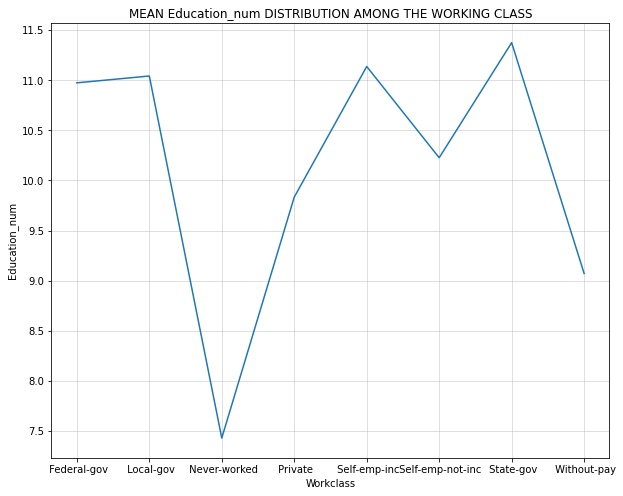

In [57]:
plt.figure(figsize=(10,8))
plt.grid(True,alpha=0.5)
sns.lineplot(x=wd['Workclass'],y=wd['Education_num'])
plt.title("MEAN Education_num DISTRIBUTION AMONG THE WORKING CLASS")
plt.show()

StaeGov,Federal gov jobs are the among the workclass which require a high qualification and experience levels as mean range around 11 which is among the top qualifications<br>


<B> FINAL WEIGHT INFLUENCE AMONG THE FEATURES!!

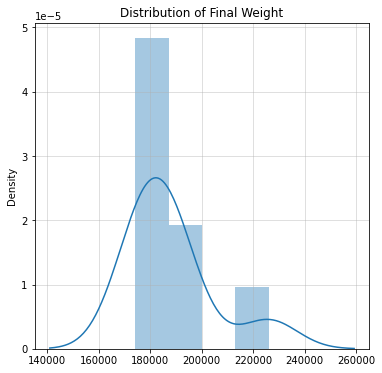

In [58]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.distplot(x=wd['Fnlwgt'])
plt.title("Distribution of Final Weight")
plt.show()

A considerable skewness can be observed to the right<br>
Mean lies around a count of 180000 having the maximum density towrads it!!<br>


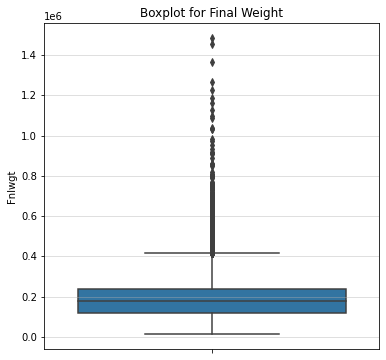

In [59]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.boxplot(y=df['Fnlwgt'])
plt.title("Boxplot for Final Weight")
plt.show()

Exceesive outliers can be seen throughout the range <br>
We gotta explore more to judge the behaviour of the Fianl Weight!!

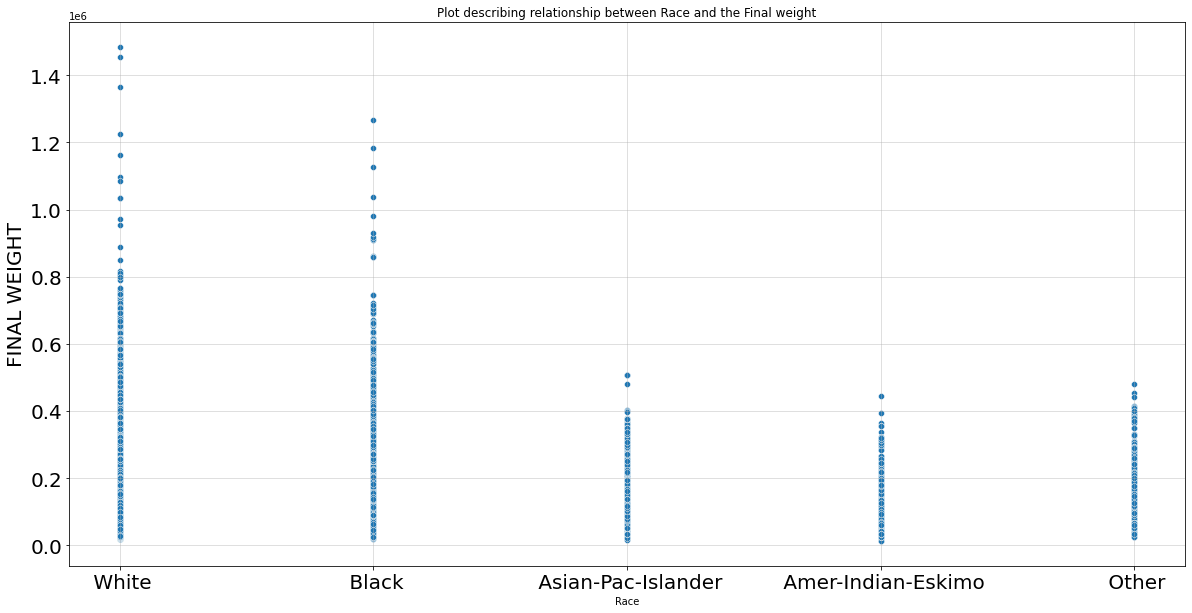

In [60]:
plt.figure(figsize=(20,10))
plt.grid(True,alpha=0.5)
sns.scatterplot(x=df['Race'],y=df['Fnlwgt'])
plt.ylabel("FINAL WEIGHT",fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("Plot describing relationship between Race and the Final weight")
plt.show()

Final weight gives an idea about the number of people with similar Race,Demographic background and Sex<br>
More dense regions in White category infers that Maximum population cosists of White people followed by the Blacks<br>


<B>EDUCATON AND EDUCATION_NUM<BR>

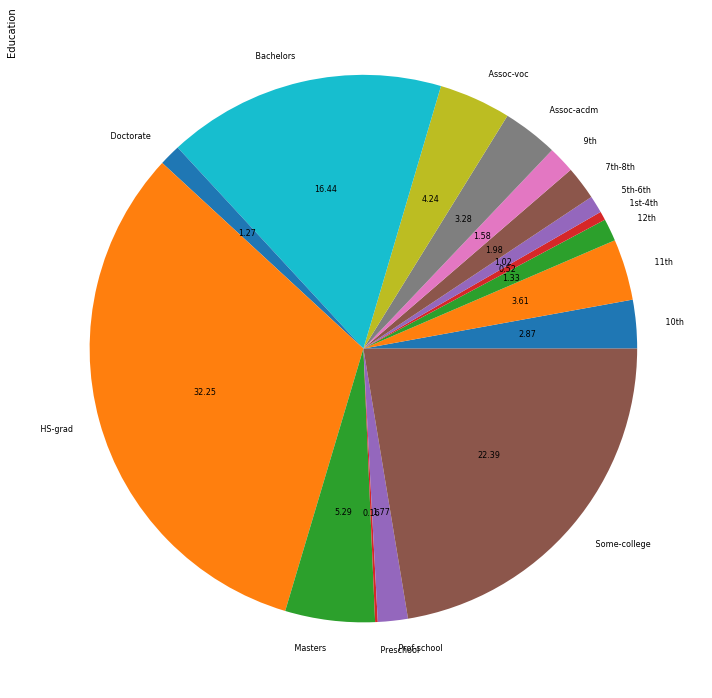

In [61]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(10,25))
df.groupby('Education').size().plot(kind='pie',autopct='%.2f',ax=ax1,textprops={'fontsize': 8})
plt.ylabel('Education',fontsize=10,loc='top')
plt.tight_layout()
plt.show()

Percentwise distribution can be seen over the pie plot<br>
High school grads hold the maximum percent count(32.35%) over the entire population this might be because of minimum qualification set by the government<br>
22.39% of the population are the graduates from some college<br>

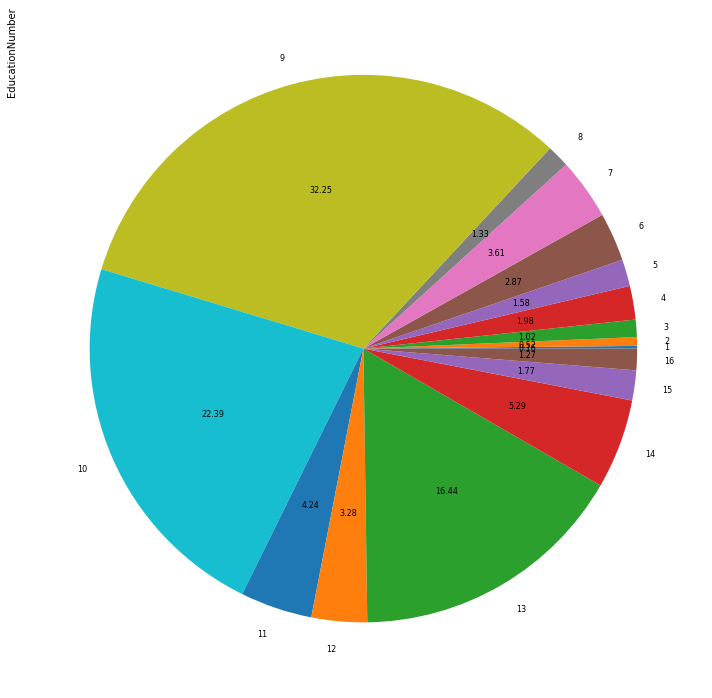

In [62]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(10,20))
df.groupby('Education_num').size().plot(kind='pie',autopct='%.2f',ax=ax1,textprops={'fontsize': 8})
plt.ylabel('EducationNumber',fontsize=10,loc='top')
plt.tight_layout()
plt.show()

A pie-plot describing the distribution among the different education numbers <br>
32.35% of the workclass consititutes of those who have a education number of 9<br>
Only  1.27 % of the population have gained the education number of 16 which is the highest among all<br>



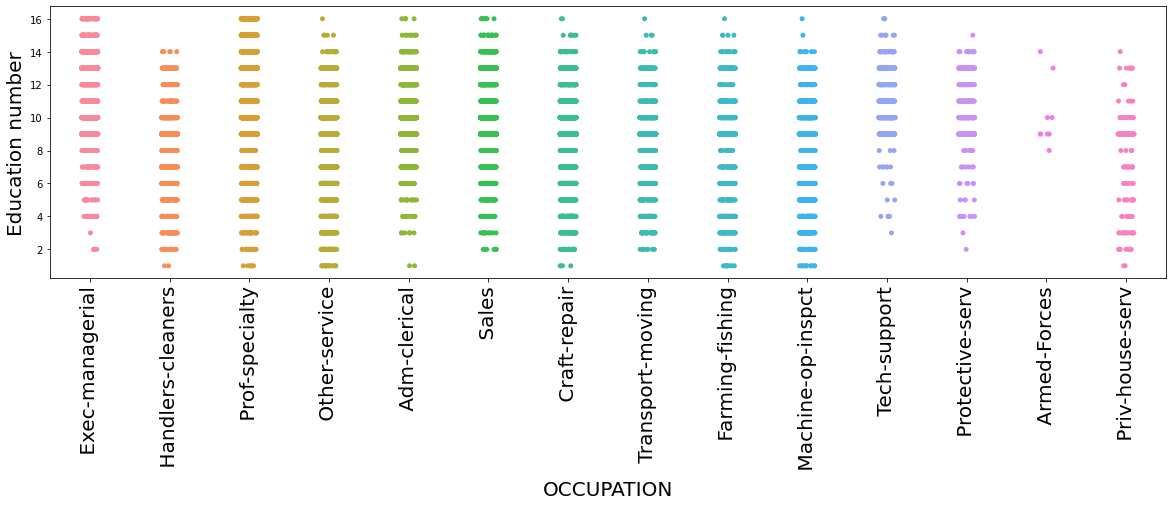

In [63]:
plt.figure(figsize=(20,5))
sns.stripplot(x=df['Occupation'],y=df['Education_num'])
plt.ylabel("Education number",fontsize=20)
plt.xlabel("OCCUPATION",fontsize=20)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.show()

In [64]:
en=df.groupby(['Education_num']).mean()

In [65]:
en['Education_num']=en.index

In [66]:
en

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Education_num
Education_num,,,,,,
1,42.764706,235889.372549,898.392157,66.490196,36.647059,1
2,46.142857,239303.000000,125.875000,48.327381,38.255952,2
3,42.885886,232448.333333,176.021021,68.252252,38.897898,3
4,48.445820,188079.171827,233.939628,65.668731,39.366873,4
5,41.060311,202485.066148,342.089494,28.998054,38.044747,5
6,37.429796,196832.465166,404.574491,56.845659,37.052519,6
7,32.355745,194928.077447,215.097872,50.079149,33.925957,7
8,32.000000,199097.508083,284.087760,32.337182,35.780600,8
9,38.974479,189538.739739,576.800114,70.466622,40.575374,9


Text(0.5, 1.0, 'MEAN AGE DISTRIBUTION ON DIFFERENT EDUCATION_NUMBERS')

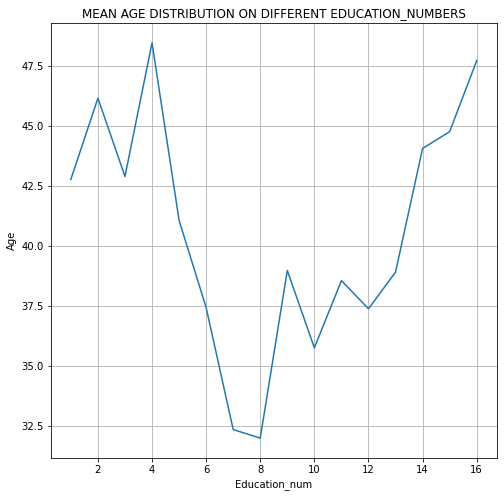

In [67]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.lineplot(x=en['Education_num'],y=en['Age'])
plt.title("MEAN AGE DISTRIBUTION ON DIFFERENT EDUCATION_NUMBERS")


A gradual increase in the mean age can be seen over the levels 10 to 16!!<br>
A sudden drop in the mean age from around 50 to 43 then to 30 can be seen over the levels 4 to 6!!<br>


Text(0.5, 1.0, 'Trends in the distribution of  average hours per week ')

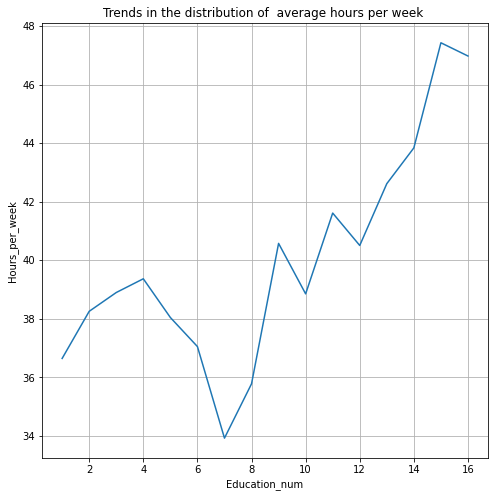

In [68]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.lineplot(x=en['Education_num'],y=en['Hours_per_week'])
plt.title("Trends in the distribution of  average hours per week ")

A rough idea can be drawn out from the plot as increase in eduction_num demands increasing in working hours_per_week <br>
With those having a education number of 16 having the highest working hours per week<br>

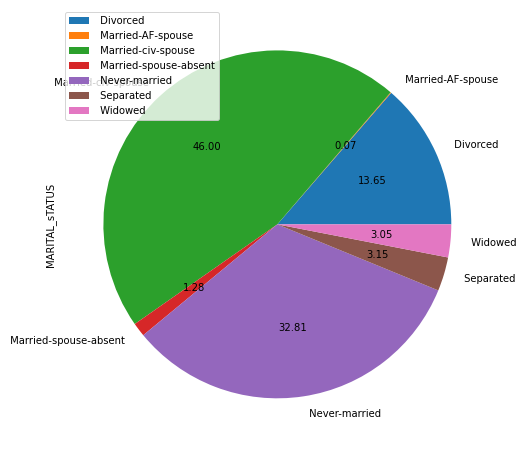

In [69]:
plt.figure(figsize=(8,8))
df.groupby(['Marital_status']).size().plot(kind='pie',autopct="%.2f")
plt.ylabel("MARITAL_sTATUS")
plt.legend(loc='best')
plt.show()


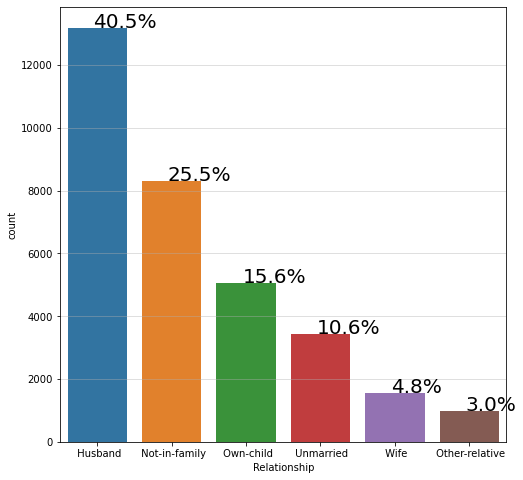

In [70]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
ax=sns.countplot(df['Relationship'],order=df['Relationship'].value_counts().index)
without_hue(ax,df['Relationship'])
plt.show()


A plot describing the relationship of the the person <br>
Mostly are the husbands with a count of 40.5%<br>
Then comes those who are not in family and constitues 25.5 % of the population<br>


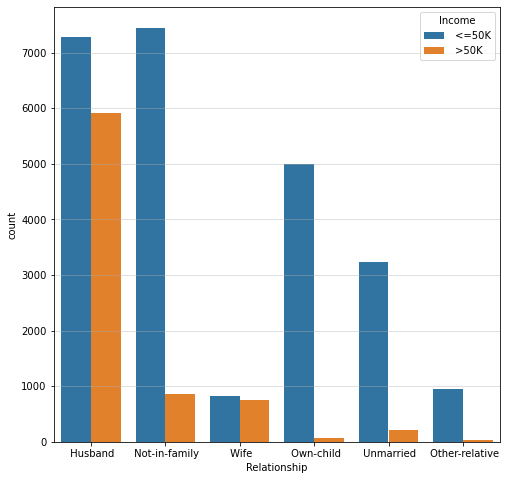

In [71]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
ax=sns.countplot(df['Relationship'],hue=df['Income'])
plt.show()

Those having the relationship tag of a husband are the among the top who earns a Income of greater than 50k<br>

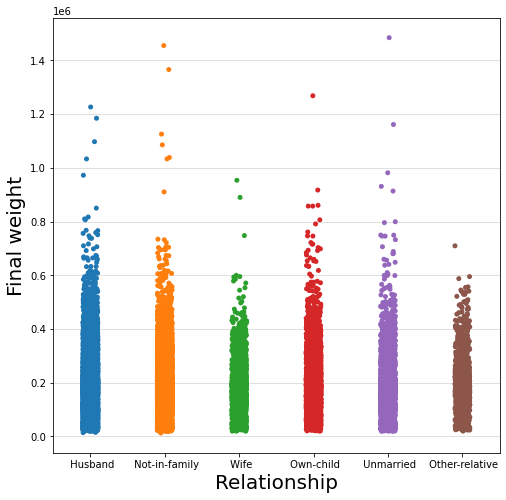

In [72]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
ax=sns.stripplot(x=df['Relationship'],y=df['Fnlwgt'])
plt.xlabel("Relationship",fontsize=20)
plt.ylabel("Final weight",fontsize=20)
plt.show()

A  plot describing the relationship between Relationship and Final weight <br>
It can be seen that it follows the same trend as of Countplot<br>


"GENDER" AS  feature influencing other features!!


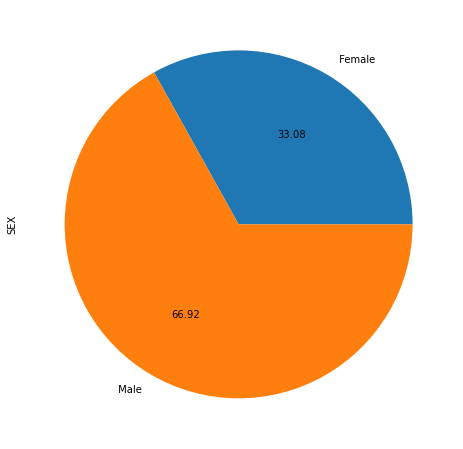

In [73]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
df.groupby(['Sex']).size().plot(kind='pie',autopct='%.2f')
plt.ylabel("SEX",fontsize=10)
plt.show()

A clear distribution of the gender can be seen here!!<br>
Male dominates the population with a percentage of 66.92

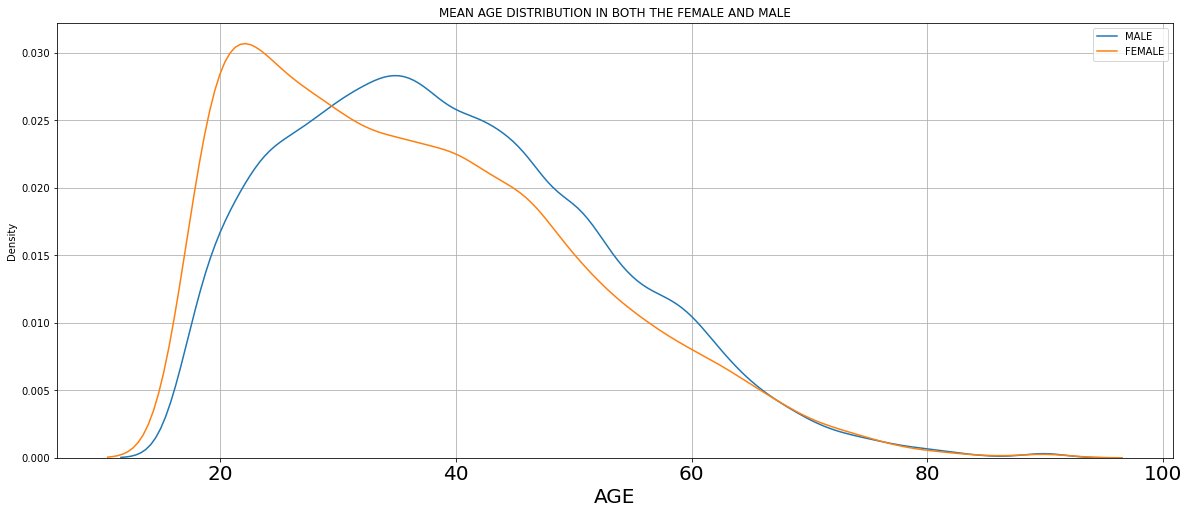

In [74]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.kdeplot(df.loc[df['Sex']==' Male','Age'],label='MALE')
sns.kdeplot(df.loc[df['Sex']==' Female','Age'],label='FEMALE')
plt.xlabel("AGE",fontsize=20)
plt.xticks(size=20)
plt.title("MEAN AGE DISTRIBUTION IN BOTH THE FEMALE AND MALE")
plt.legend()
plt.show()

MEAN AGE OF FEMALE is around 22 WHICH IS LESS THAN MEAN  AGE OF MALE 35<BR>
Rightward skewness can be observed in both the categories<br>
Presence of outliers<br>

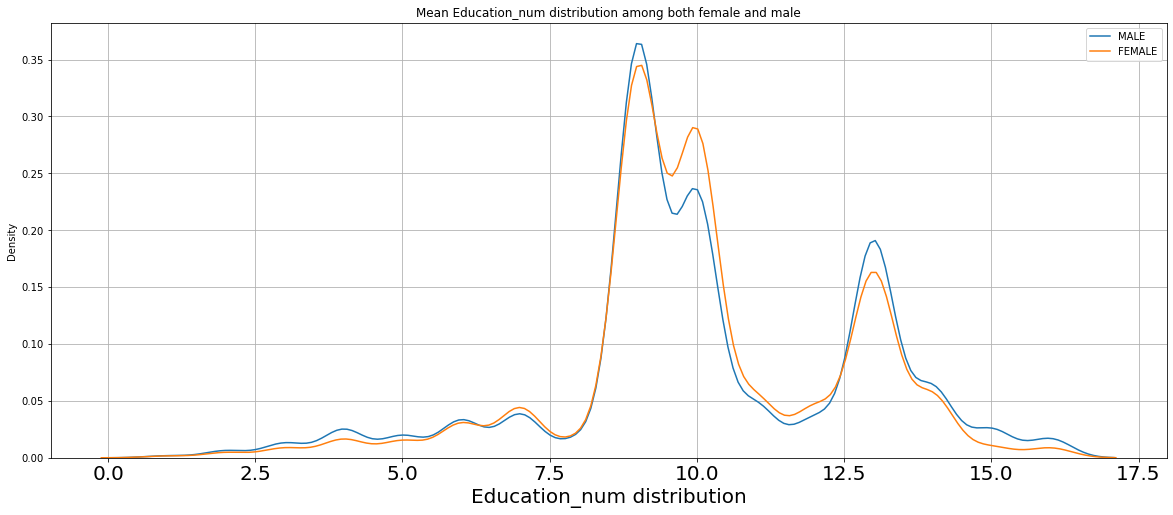

In [75]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.kdeplot(df.loc[df['Sex']==' Male','Education_num'],label='MALE')
sns.kdeplot(df.loc[df['Sex']==' Female','Education_num'],label='FEMALE')
plt.xlabel("Education_num distribution",fontsize=20)
plt.title("Mean Education_num distribution among both female and male")
plt.xticks(size=20)
plt.legend()
plt.show()

SIMILAR PLOTS CAN BE SEEN IN BOTH THE CATEGORIES<BR><BR>
SHOWING SAME KIND OF DISTRIBUTION AMONG ALL THE Education_num levels<br><BR>
    EQUAL OPPORTUNITIES FOR BOTH FEMALE AND MALE IN TERMS OF EDUCATION MIGHT BE THE REASON<BR>
    



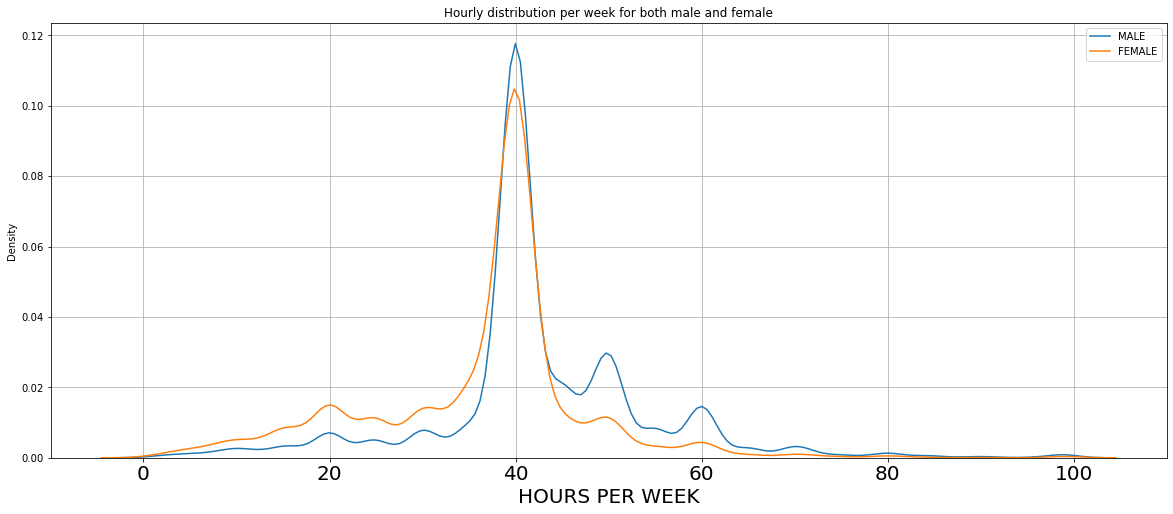

In [76]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.kdeplot(df.loc[df['Sex']==' Male','Hours_per_week'],label='MALE')
sns.kdeplot(df.loc[df['Sex']==' Female','Hours_per_week'],label='FEMALE')
plt.xlabel("HOURS PER WEEK",fontsize=20)
plt.xticks(size=20)
plt.title("Hourly distribution per week for both male and female")
plt.legend()
plt.show()

As the hours per week increases density for the mean of female workers keep decreasing<br>
The mean age of both is found to be same but more dense for male as compared to females<br>
Infering to the fact that male workers are working more rigrously over the week<br>


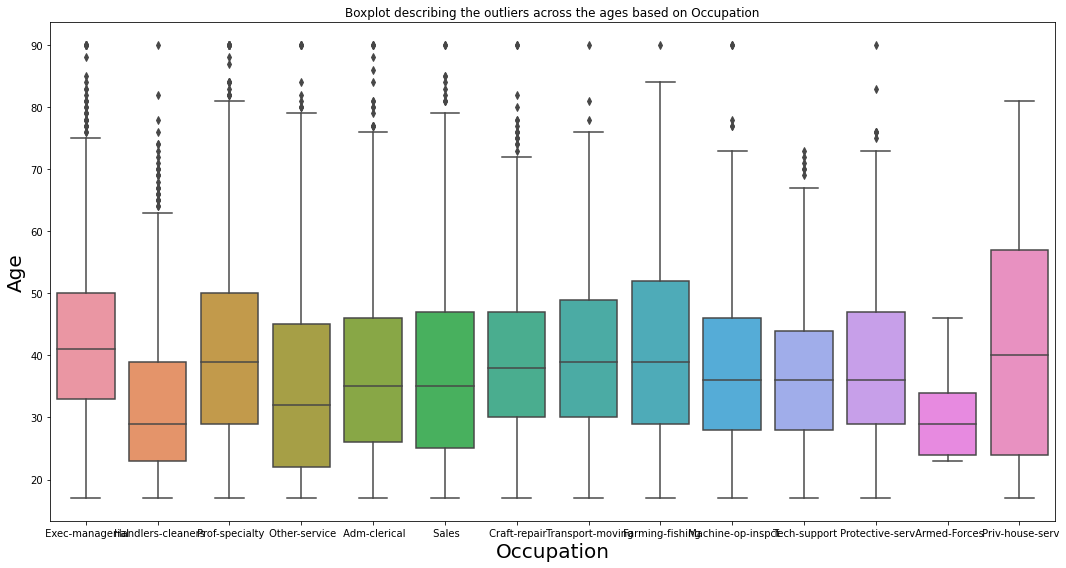

In [77]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Occupation'],y=df['Age'])
plt.xlabel("Occupation",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Boxplot describing the outliers across the ages based on Occupation")
plt.tight_layout()
plt.show()


Except Armed forces  all the occupations have relative number of outliers<br>

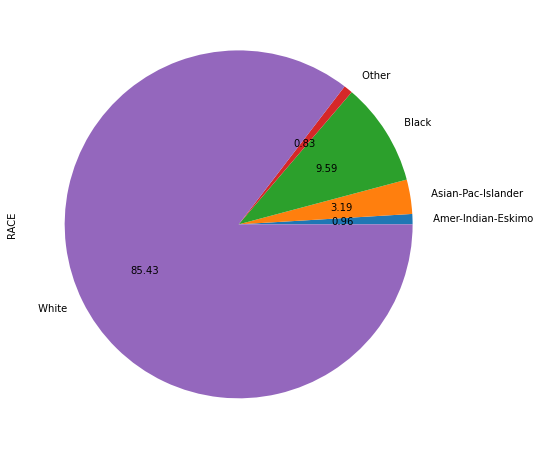

In [78]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
df.groupby(['Race']).size().plot(kind='pie',autopct='%.2f')
plt.ylabel("RACE",fontsize=10)
plt.show()

Majority of the US POPULATION consists of the WHITEs around (85.43% followed by the black(9.59)%<br>
Amer-Indian-Eskimo have a percentage of 0.96<br>
Asian -Pac-islander have a precentage of 3.19 among the population<br>
                                                             

In [79]:
qw=df.groupby(['Race']).mean()

In [80]:
qw['Race']=qw.index

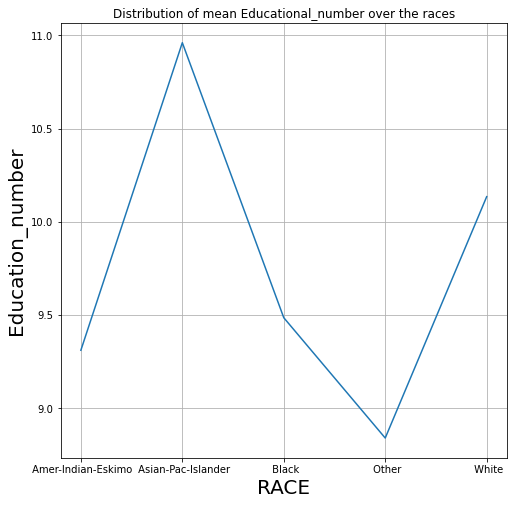

In [81]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.lineplot(x=qw['Race'],y=qw['Education_num'])
plt.xlabel("RACE",fontsize=20)
plt.ylabel("Education_number",fontsize=20)
plt.title("Distribution of mean Educational_number over the races")
plt.show()




Those coming from the Asian-Pac-Islander have a mean education_number of 10.8 which is highest among the races <br>




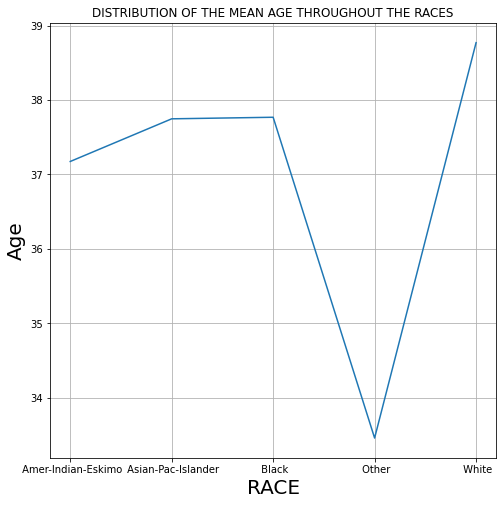

In [82]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.lineplot(x=qw['Race'],y=qw['Age'])
plt.xlabel("RACE",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("DISTRIBUTION OF THE MEAN AGE THROUGHOUT THE RACES")
plt.show()


A plot showing how the mean age is distributed across the races with White people having the highest mean age followed by Black <br>


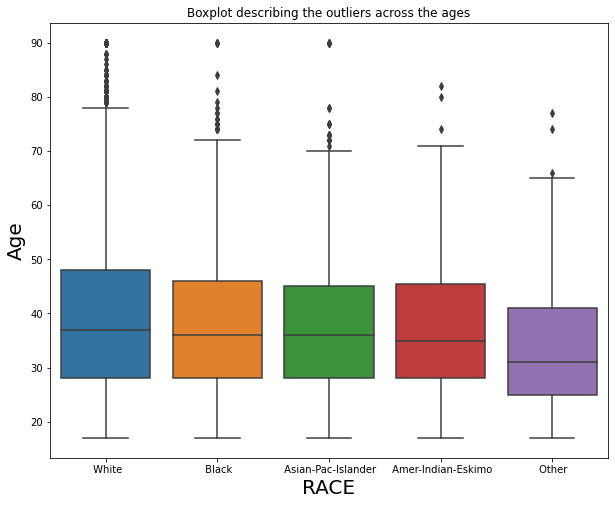

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Race'],y=df['Age'])
plt.xlabel("RACE",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Boxplot describing the outliers across the ages")
plt.show()


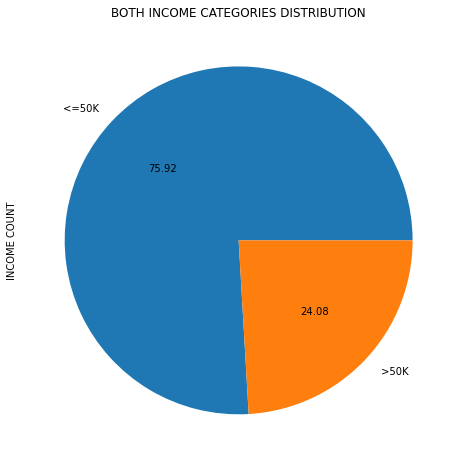

In [84]:
plt.figure(figsize=(8,8))
df.groupby(['Income']).size().plot(kind='pie',autopct='%.2f')
plt.ylabel("INCOME COUNT")
plt.title("BOTH INCOME CATEGORIES DISTRIBUTION")
plt.show()

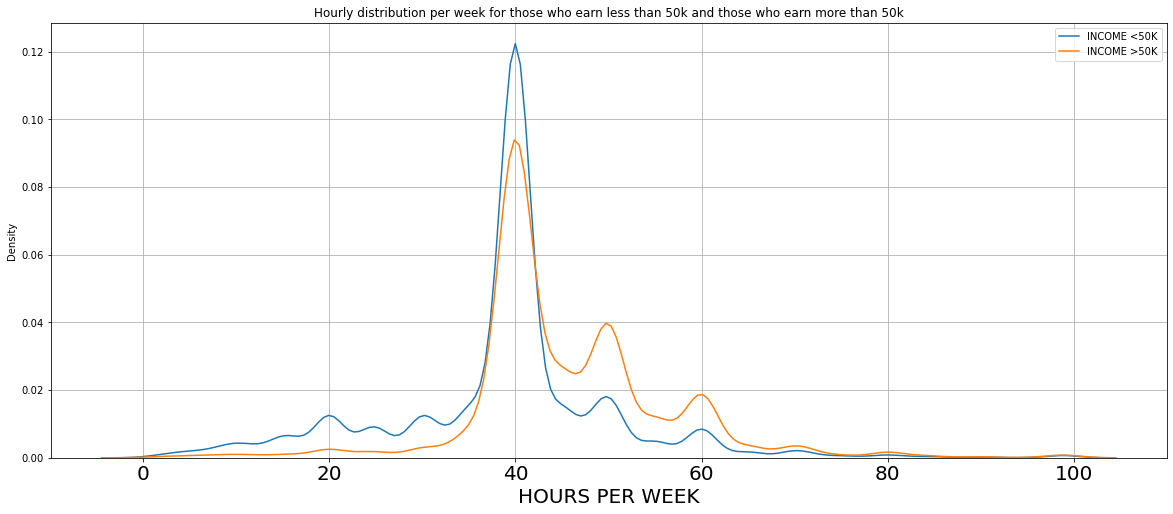

In [85]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.kdeplot(df.loc[df['Income']==' <=50K','Hours_per_week'],label='INCOME <50K')
sns.kdeplot(df.loc[df['Income']==' >50K','Hours_per_week'],label='INCOME >50K')
plt.xlabel("HOURS PER WEEK",fontsize=20)
plt.xticks(size=20)
plt.title("Hourly distribution per week for those who earn less than 50k and those who earn more than 50k")
plt.legend()
plt.show()

For those who earn more than 50k have more dense distribution towards the right about the mean<br>
It can be observed that those who work more per week tends to have a income greater than 50k<br>



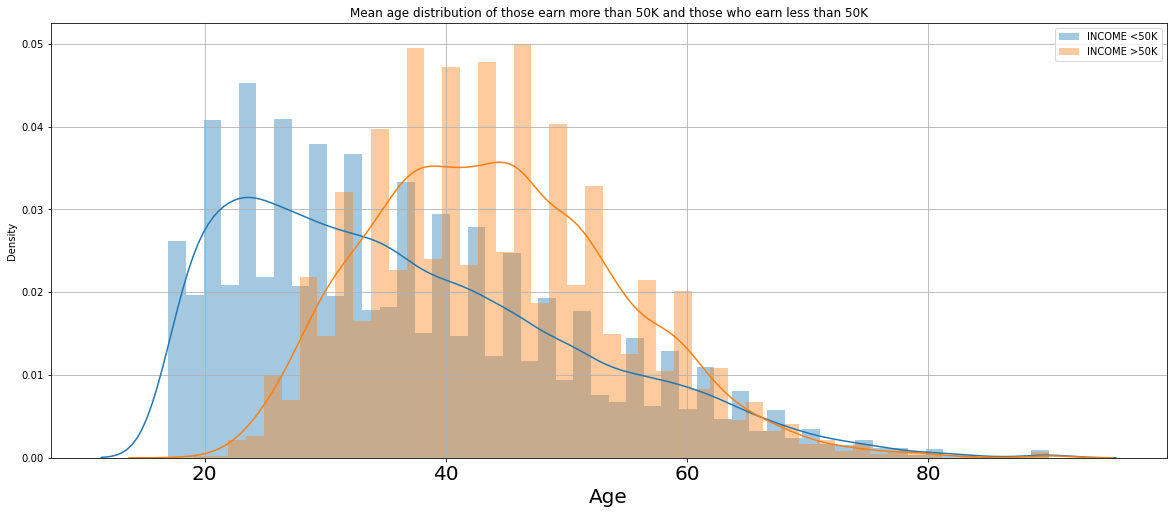

In [86]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.distplot(df.loc[df['Income']==' <=50K','Age'],label='INCOME <50K')
sns.distplot(df.loc[df['Income']==' >50K','Age'],label='INCOME >50K')
plt.xlabel("Age",fontsize=20)
plt.xticks(size=20)
plt.title("Mean age distribution of those earn more than 50K and those who earn less than 50K")
plt.legend()
plt.show()

It can be observed that for those who earn more than 50k have mean age greater than those who earn less than 50k<br>
Bilateral spread can be seen as the age increases!!




In [87]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Encoding the categorial columns !!
-----------------

<b>Encoding Workclass

In [88]:
ft=pd.DataFrame(pd.get_dummies(df['Workclass'],drop_first=True))

In [89]:
df=pd.concat([df,ft],axis=1)

In [90]:
df.drop(['Workclass'],axis=1,inplace=True)

<b>Ordinal Encoding Education column!!


In [91]:
from sklearn.preprocessing import OrdinalEncoder

In [92]:
oe=OrdinalEncoder(categories=[[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' HS-grad',' 11th',' 12th',' Prof-school',' Some-college',' Bachelors',' Masters',' Assoc-acdm',' Assoc-voc',' Doctorate']])

In [93]:
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))

<b>Label encoding Marital_Status

In [94]:
lee={value:keys for keys,value in enumerate(df['Marital_status'].unique())}

In [95]:
df['Marital_status']=df['Marital_status'].map(lee)

<b> Binary Encoding Occupation

In [96]:
from category_encoders import BinaryEncoder

In [97]:
be=BinaryEncoder()

In [98]:
de=pd.DataFrame(be.fit_transform(df['Occupation']))

In [99]:
df=pd.concat([df,de],axis=1)

In [100]:
df.drop(['Occupation'],axis=1,inplace=True)

In [101]:
df.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,...,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Occupation_0,Occupation_1,Occupation_2,Occupation_3
0,50,83311,11.0,13,0,Husband,White,Male,0,0,...,0,0,0,1,0,0,0,0,0,1
1,38,215646,6.0,9,1,Not-in-family,White,Male,0,0,...,0,1,0,0,0,0,0,0,1,0
2,53,234721,7.0,7,0,Husband,Black,Male,0,0,...,0,1,0,0,0,0,0,0,1,0
3,28,338409,11.0,13,0,Wife,Black,Female,0,0,...,0,1,0,0,0,0,0,0,1,1
4,37,284582,12.0,14,0,Wife,White,Female,0,0,...,0,1,0,0,0,0,0,0,0,1


<b> Encoding Relationship,Race,Sex

In [102]:
kj={v:k for k,v in enumerate(df['Relationship'].unique())}

In [103]:
df['Relationship']=df['Relationship'].map(kj)

<b> Encoding Race column using get dummies<br>

In [104]:
qw=pd.DataFrame(pd.get_dummies(df['Race'],drop_first=True))

In [105]:
df=pd.concat([df,qw],axis=1)

In [106]:
df.drop(['Race'],axis=1,inplace=True)

In [107]:
df.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,...,State-gov,Without-pay,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Asian-Pac-Islander,Black,Other,White
0,50,83311,11.0,13,0,0,Male,0,0,13,...,0,0,0,0,0,1,0,0,0,1
1,38,215646,6.0,9,1,1,Male,0,0,40,...,0,0,0,0,1,0,0,0,0,1
2,53,234721,7.0,7,0,0,Male,0,0,40,...,0,0,0,0,1,0,0,1,0,0
3,28,338409,11.0,13,0,2,Female,0,0,40,...,0,0,0,0,1,1,0,1,0,0
4,37,284582,12.0,14,0,2,Female,0,0,40,...,0,0,0,0,0,1,0,0,0,1


<B> ENCODING SEX COLUMN

In [108]:
dic={' Male':1,' Female':0}

In [109]:
df['Sex']=df['Sex'].map(dic)

<B> Encoding Income column

In [110]:
fg={' <=50K':0,' >50K':1}

In [111]:
df['Income']=df['Income'].map(fg)

<b>Binary Encoding Native country columns!!

In [112]:
qq=pd.DataFrame(be.fit_transform(df['Native_country']))

In [113]:
qq

,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
32555,0,0,0,0,0,1
32556,0,0,0,0,0,1
32557,0,0,0,0,0,1
32558,0,0,0,0,0,1


In [114]:
df=pd.concat([df,qq],axis=1)

In [115]:
df.drop(['Native_country'],axis=1,inplace=True)

HANDLING OUTLIERS!!
-----------------

In [116]:
print(f'SHAPE BEFORE OUTLIER REMOVAL IS {df.shape}')

SHAPE BEFORE OUTLIER REMOVAL IS (32560, 32)


In [117]:
from scipy.stats import zscore

In [118]:
df1=df.copy()

In [119]:
z=np.abs(zscore(df1))

In [120]:
df1=df1[(z<3).all(axis=1)]

In [121]:
print(f'SHAPE AFTER OUTLIER REMOVAL IS {df1.shape}')

SHAPE AFTER OUTLIER REMOVAL IS (18831, 32)


In [122]:
print(f"PERCENTAGE LOSS AFTER THE OUTLIER REMOVAL IS {(32560-18821)/32560*100}")

PERCENTAGE LOSS AFTER THE OUTLIER REMOVAL IS 42.195945945945944


Since the loss is too much greater than 10 percent we will continuw with the outliers!!

Checking the skewness
-----------------

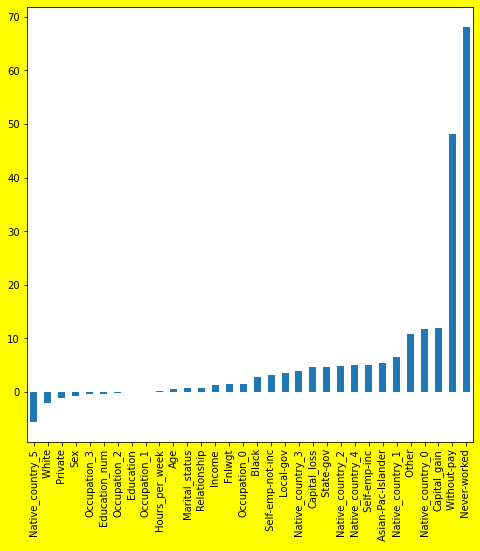

In [123]:
plt.figure(figsize=(8,8),facecolor='Yellow')
df.skew().sort_values().plot(kind='bar')
plt.show()

WE CAN CONTROLL THE SKEWNESS OF THESE FEATURES by using POWERTRANSFORMER

In [124]:
from sklearn.preprocessing import PowerTransformer

In [125]:
pt=PowerTransformer()

 SPLIITING DATA INTO FEATURES AND LABEL


In [126]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [127]:
x_scaled=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

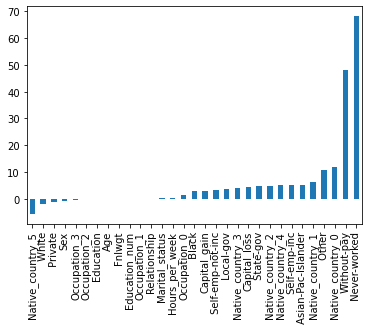

In [128]:
x_scaled.skew().sort_values().plot(kind='bar')
plt.show()

<B>CONSIDERBALE REDUCE IN THE SKEWNESS CAN BE SEEN FROM THE POWERTRANSFORMER!!


In [129]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

<B>CHECKING FOR THE VARIANCE INFLATION FACTOR(MULTI-COLLINEARITY)
----------------

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
vif=pd.DataFrame()

In [132]:
vif['FEATURES']=x_scaled.columns

In [133]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

In [134]:
vif

,FEATURES,scores
0,Age,1.296705
1,Fnlwgt,1.044957
2,Education,3.157614
3,Education_num,3.498656
4,Marital_status,2.456354
5,Relationship,3.101126
6,Sex,1.578173
7,Capital_gain,1.047652
8,Capital_loss,1.021900
9,Hours_per_week,1.146292


<B>IT CAN BE CLEARLY OBSERVED THAT NONE OF THE SCORES ARE EXCEEDING THE CRITICAL VALUE 5!! SO ITS CONFIRM THAT THERE IS NO MULTI-COLLINEARITY ISSURE PRESENT IN THE DATA

Selecting best features using SelectKBest
-----------------------

In [135]:
x_scaled.shape[1]

31

In [136]:
from sklearn.feature_selection import SelectKBest,f_classif

In [137]:
sel=SelectKBest(score_func=f_classif,k=25)

In [138]:
k=25

In [139]:
fit=sel.fit(x_scaled,y)

In [140]:
cols=fit.get_support(indices=True)

In [141]:
print(f' top {k} FEATURES INDEX  = {cols}')

 top 25 FEATURES INDEX  = [ 0  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 28]


GETTING THE FEATURES OF BASED ON THE INDICES AND SAVING THEM AS FEATUERES

In [142]:
features=x_scaled.columns[cols]

In [143]:
len(features)

25

In [144]:
features_scores=pd.DataFrame()

features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [145]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

In [146]:
print(f'TOP {k} FEATURES AND SCORES ARE AS FOLLOWS')

TOP 25 FEATURES AND SCORES ARE AS FOLLOWS


In [147]:
features_scores[:26]

,FEATURES,SCORES
4,Marital_status,7363.655110
5,Relationship,5695.051556
3,Education_num,4384.565619
7,Capital_gain,2484.518421
0,Age,2440.436778
2,Education,2135.137704
9,Hours_per_week,1813.303140
6,Sex,1593.288816
20,Occupation_3,833.854680
18,Occupation_1,676.830183


In [148]:
x_scaled=x_scaled[features]

In [149]:
x_scaled.head()

,Age,Education,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Local-gov,...,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Black,Other,White,Native_country_0,Native_country_1,Native_country_3
0,0.891947,0.794432,1.164793,-1.020887,-1.097512,0.703087,-0.30137,-0.221213,-2.221515,-0.262102,...,-0.491154,-0.960249,-1.124461,0.800292,-0.325774,-0.091613,0.413027,-0.084898,-0.151122,-0.241192
1,0.102717,-0.884533,-0.464330,0.135651,0.148738,0.703087,-0.30137,-0.221213,-0.035570,-0.262102,...,-0.491154,-0.960249,0.889315,-1.249544,-0.325774,-0.091613,0.413027,-0.084898,-0.151122,-0.241192
2,1.064381,-0.546655,-1.200274,-1.020887,-1.097512,0.703087,-0.30137,-0.221213,-0.035570,-0.262102,...,-0.491154,-0.960249,0.889315,-1.249544,3.069615,-0.091613,-2.421148,-0.084898,-0.151122,-0.241192
3,-0.731663,0.794432,1.164793,-1.020887,0.748840,-1.422298,-0.30137,-0.221213,-0.035570,-0.262102,...,-0.491154,-0.960249,0.889315,0.800292,3.069615,-0.091613,-2.421148,-0.084898,-0.151122,-0.241192
4,0.028023,1.127591,1.600809,-1.020887,0.748840,-1.422298,-0.30137,-0.221213,-0.035570,-0.262102,...,-0.491154,-0.960249,-1.124461,0.800292,-0.325774,-0.091613,0.413027,-0.084898,-0.151122,-0.241192


In [150]:
x_scaled.shape

(32560, 25)

MODEL 1) LOGISTIC REGRESSION
-----------------

<B> IMPORTING NECESSARY LIBRARIES

In [151]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [152]:
for i in range (0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 5


TRAINING ACCURACY IS -83.65  --AND TESTING ACCURACY IS 83.65


AT RANDOM STATE-- 14


TRAINING ACCURACY IS -83.57  --AND TESTING ACCURACY IS 83.63


AT RANDOM STATE-- 34


TRAINING ACCURACY IS -83.6  --AND TESTING ACCURACY IS 83.57


AT RANDOM STATE-- 41


TRAINING ACCURACY IS -83.56  --AND TESTING ACCURACY IS 83.6


AT RANDOM STATE-- 55


TRAINING ACCURACY IS -83.58  --AND TESTING ACCURACY IS 83.61


AT RANDOM STATE-- 63


TRAINING ACCURACY IS -83.63  --AND TESTING ACCURACY IS 83.58


AT RANDOM STATE-- 69


TRAINING ACCURACY IS -83.59  --AND TESTING ACCURACY IS 83.63


AT RANDOM STATE-- 75


TRAINING ACCURACY IS -83.59  --AND TESTING ACCURACY IS 83.63


AT RANDOM STATE-- 84


TRAINING ACCURACY IS -83.64  --AND TESTING ACCURACY IS 83.55


AT RANDOM STATE-- 88


TRAINING ACCURACY IS -83.62  --AND TESTING ACCURACY IS 83.65


AT RANDOM STATE-- 104


TRAINING ACCURACY IS -83.62  --AND TESTING ACCURACY IS 83.58


AT RANDOM STATE-- 111


TRAINING ACCURACY IS -83.58  -

SINCE ITS GIVING almost SAME VALUE for all random states we can take any taking random state as 347

In [211]:
ran=347

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=347)

In [213]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [214]:
lr=LogisticRegression()

In [215]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 83.61


CONFUSION MATRIX FOR THE TRAINIG


 [[18372  1438]
 [ 2830  3408]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.87      0.93      0.90     19810
           1       0.70      0.55      0.61      6238

    accuracy                           0.84     26048
   macro avg       0.78      0.74      0.76     26048
weighted avg       0.83      0.84      0.83     26048



Testing SCORE FOR THE LogisticRegression() is 83.61


CONFUSION MATRIX FOR THE TESTING


 [[4542  367]
 [ 700  903]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.93      0.89      4909
           1       0.71      0.56      0.63      1603

    accuracy                           0.84      6512
   macro avg       0.79      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



In [216]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  83.47

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 3

CROSS VAL SCORE IS  83.5

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 4

CROSS VAL SCORE IS  83.52

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 5

CROSS VAL SCORE IS  83.54

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 6

CROSS VAL SCORE IS  83.54

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 7

CROSS VAL SCORE IS  83.55

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 8

CROSS VAL SCORE IS  83.54

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 9

CROSS VAL SCORE IS  83.54

TEST ACCURACY SCORE IS  83.61
-------------

AT CV = 10

CROSS VAL SCORE IS  83.54

TEST ACCURACY SCORE IS  83.61
-------------


TAKNG CV=5

SINCE THERE IS NOT MYCH DIFFERNCE BETWEEEN CROSS VAL SCORE AND TEST ACCURACY SCORE AT CV =5 <BR>
IT CAN BE DEDUCED THAT OUR MODEL IS NOT OVERFITTING AND WE CAN PROCEED WITH RANDOM STATE -347 AND CV=5

In [217]:
c=5

In [218]:
from sklearn.model_selection import GridSearchCV

MODEL 2)---DECISION TREE MODELING
----------------------

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dt=DecisionTreeClassifier()

In [221]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [222]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier() is 97.67


CONFUSION MATRIX FOR THE TRAINIG


 [[19719    91]
 [  515  5723]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      1.00      0.98     19810
           1       0.98      0.92      0.95      6238

    accuracy                           0.98     26048
   macro avg       0.98      0.96      0.97     26048
weighted avg       0.98      0.98      0.98     26048



Testing SCORE FOR THE DecisionTreeClassifier() is 80.8


CONFUSION MATRIX FOR THE TESTING


 [[4325  584]
 [ 666  937]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4909
           1       0.62      0.58      0.60      1603

    accuracy                           0.81      6512
   macro avg       0.74      0.73      0.74      6512
weighted avg       0.80      0.81      0.81      6512



Hyper Parameter tuning
---------------------

In [223]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [224]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(18,25),
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(6,10)}

In [225]:
dgsc=GridSearchCV(dt,param_grid=para,cv=5)

In [226]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': array([6, 7, 8, 9]),
                         'min_samples_split': array([4, 5, 6])})

In [227]:
dgsc.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 8,
 'min_samples_split': 6}

In [228]:
dt=dgsc.best_estimator_

In [229]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=8,
                       min_samples_split=6) is 88.2


CONFUSION MATRIX FOR THE TRAINIG


 [[18698  1112]
 [ 1962  4276]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.91      0.94      0.92     19810
           1       0.79      0.69      0.74      6238

    accuracy                           0.88     26048
   macro avg       0.85      0.81      0.83     26048
weighted avg       0.88      0.88      0.88     26048



Testing SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=8,
                       min_samples_split=6) is 85.0


CONFUSION MATRIX FOR THE TESTING


 [[4539  370]
 [ 607  996]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4909
           1       0.73      0.62   

In [230]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [231]:
cross_val=cross_val_score(dt,x_scaled,y,cv=5).mean()

In [232]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  84.37

TEST ACCURACY SCORE IS  85.0


INCREASED TESTING ACCURACY AND DIFFERENCE BETWEEN TRAINING AND TESTING IS REDUCED!!

MODEL 3)--RANDOM FOREST CLASSIFIER
----------------------

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [234]:
rfc=RandomForestClassifier()

In [235]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [236]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [237]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 97.67


CONFUSION MATRIX FOR THE TRAINIG


 [[19589   221]
 [  385  5853]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.98      0.99      0.98     19810
           1       0.96      0.94      0.95      6238

    accuracy                           0.98     26048
   macro avg       0.97      0.96      0.97     26048
weighted avg       0.98      0.98      0.98     26048



Testing SCORE FOR THE RandomForestClassifier() is 84.78


CONFUSION MATRIX FOR THE TESTING


 [[4528  381]
 [ 610  993]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4909
           1       0.72      0.62      0.67      1603

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.78      6512
weighted avg       0.84      0.85      0.84      6512



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------

In [238]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [239]:
rfc=RandomForestClassifier()

In [240]:
parma={"n_estimators":[50,55,58],
       "min_samples_split":[2,3],
       "random_state":[165,230,610],
       "min_samples_leaf":[4,5,6]
       }

In [241]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [242]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 55, 58],
                         'random_state': [165, 230, 610]})

In [243]:
rgsc.best_params_

{'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 55,
 'random_state': 610}

In [244]:
rfc=rgsc.best_estimator_

In [245]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(min_samples_leaf=6, n_estimators=55, random_state=610) is 87.71


CONFUSION MATRIX FOR THE TRAINIG


 [[18873   937]
 [ 2264  3974]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.89      0.95      0.92     19810
           1       0.81      0.64      0.71      6238

    accuracy                           0.88     26048
   macro avg       0.85      0.79      0.82     26048
weighted avg       0.87      0.88      0.87     26048



Testing SCORE FOR THE RandomForestClassifier(min_samples_leaf=6, n_estimators=55, random_state=610) is 85.9


CONFUSION MATRIX FOR THE TESTING


 [[4628  281]
 [ 637  966]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4909
           1       0.77      0.60      0.68      1603

    accuracy                           0.86      6512
   macro avg  

Better testing accuracies can be seen after the hyper parameter tuning!!
These features can be considered while finalisng this model!!

In [246]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [247]:
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [248]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  86.09

TEST ACCURACY SCORE IS  85.9


AGAIN HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------
-----------------------

In [249]:
rfc=RandomForestClassifier()

In [250]:
parma={"n_estimators":[51,55,60,70,82],
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":[4,5,6],
       "max_depth":[20,18,23,25],
}

In [251]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [252]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 18, 23, 25],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [51, 55, 60, 70, 82]})

In [253]:
rgsc.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_split': 6,
 'n_estimators': 82}

In [254]:
rfc=rgsc.best_estimator_

In [255]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=6,
                       n_estimators=82) is 90.58


CONFUSION MATRIX FOR THE TRAINIG


 [[19109   701]
 [ 1754  4484]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.92      0.96      0.94     19810
           1       0.86      0.72      0.79      6238

    accuracy                           0.91     26048
   macro avg       0.89      0.84      0.86     26048
weighted avg       0.90      0.91      0.90     26048



Testing SCORE FOR THE RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=6,
                       n_estimators=82) is 85.96


CONFUSION MATRIX FOR THE TESTING


 [[4611  298]
 [ 616  987]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4909
           1       0.77      0.62      0

In [256]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [257]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  85.84

TEST ACCURACY SCORE IS  85.96


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [162]:
from sklearn.ensemble import BaggingClassifier

In [163]:
bc=BaggingClassifier()

In [164]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 96.55


CONFUSION MATRIX FOR THE TRAINIG


 [[19546   264]
 [  634  5604]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.97      0.99      0.98     19810
           1       0.96      0.90      0.93      6238

    accuracy                           0.97     26048
   macro avg       0.96      0.94      0.95     26048
weighted avg       0.97      0.97      0.97     26048



Testing SCORE FOR THE BaggingClassifier() is 83.78


CONFUSION MATRIX FOR THE TESTING


 [[4499  410]
 [ 646  957]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4909
           1       0.70      0.60      0.64      1603

    accuracy                           0.84      6512
   macro avg       0.79      0.76      0.77      6512
weighted avg       0.83      0.84      0.83      6512



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [172]:
bc=BaggingClassifier()

In [173]:
par={"n_estimators":[50,54,65,72],
    "oob_score":[True,False],
    "random_state":[200,220,275],
    }

In [174]:
bcgs=GridSearchCV(bc,param_grid=par)

In [175]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': [50, 54, 65, 72],
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275]})

In [176]:
bcgs.best_params_

{'n_estimators': 65, 'oob_score': True, 'random_state': 275}

In [177]:
bc=bcgs.best_estimator_

In [178]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=65, oob_score=True, random_state=275) is 97.65


CONFUSION MATRIX FOR THE TRAINIG


 [[19580   230]
 [  381  5857]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.98      0.99      0.98     19810
           1       0.96      0.94      0.95      6238

    accuracy                           0.98     26048
   macro avg       0.97      0.96      0.97     26048
weighted avg       0.98      0.98      0.98     26048



Testing SCORE FOR THE BaggingClassifier(n_estimators=65, oob_score=True, random_state=275) is 84.4


CONFUSION MATRIX FOR THE TESTING


 [[4489  420]
 [ 596 1007]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4909
           1       0.71      0.63      0.66      1603

    accuracy                           0.84      6512
   macro avg       0.79      0.7

In [179]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [180]:
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [181]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  83.67

TEST ACCURACY SCORE IS  84.4


MODEL 5)----KNN
-----------------------------

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn=KNeighborsClassifier()

In [184]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [185]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 87.62


CONFUSION MATRIX FOR THE TRAINIG


 [[18487  1323]
 [ 1901  4337]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.91      0.93      0.92     19810
           1       0.77      0.70      0.73      6238

    accuracy                           0.88     26048
   macro avg       0.84      0.81      0.82     26048
weighted avg       0.87      0.88      0.87     26048



Testing SCORE FOR THE KNeighborsClassifier() is 82.59


CONFUSION MATRIX FOR THE TESTING


 [[4445  464]
 [ 670  933]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4909
           1       0.67      0.58      0.62      1603

    accuracy                           0.83      6512
   macro avg       0.77      0.74      0.75      6512
weighted avg       0.82      0.83      0.82      6512



HYPER PARAMETER TUNING THE PARAMETERS
----------------------------

In [193]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [194]:
knn=KNeighborsClassifier()

In [195]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':[2,3,4],
    'leaf_size':[25,30,18,30]}

In [196]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [197]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 18, 30],
                         'n_neighbors': [2, 3, 4]})

In [198]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4}

In [199]:
knn=kgsc.best_estimator_

In [200]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 87.39


CONFUSION MATRIX FOR THE TRAINIG


 [[19182   628]
 [ 2656  3582]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.88      0.97      0.92     19810
           1       0.85      0.57      0.69      6238

    accuracy                           0.87     26048
   macro avg       0.86      0.77      0.80     26048
weighted avg       0.87      0.87      0.86     26048



Testing SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 81.83


CONFUSION MATRIX FOR THE TESTING


 [[4597  312]
 [ 871  732]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4909
           1       0.70      0.46      0.55      1603

    accuracy                           0.82      6512
   macro avg       0.77      0.70      0.72      6512
weighted avg   

In [201]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [202]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  82.29

TEST ACCURACY SCORE IS  81.83


MODEL 6)-----SVC-----------
-----------------------

In [203]:
from sklearn.svm import SVC

In [204]:
svc=SVC()

In [205]:
svc.fit(x_train,y_train)

SVC()

In [206]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 85.45


CONFUSION MATRIX FOR THE TRAINIG


 [[18623  1187]
 [ 2602  3636]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.88      0.94      0.91     19810
           1       0.75      0.58      0.66      6238

    accuracy                           0.85     26048
   macro avg       0.82      0.76      0.78     26048
weighted avg       0.85      0.85      0.85     26048



Testing SCORE FOR THE SVC() is 84.17


CONFUSION MATRIX FOR THE TESTING


 [[4578  331]
 [ 700  903]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4909
           1       0.73      0.56      0.64      1603

    accuracy                           0.84      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.83      0.84      0.83      6512



In [207]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(svc,x_scaled,y,cv=5).mean()

In [208]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  84.29

TEST ACCURACY SCORE IS  84.17


------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [258]:
from sklearn.metrics import plot_roc_curve

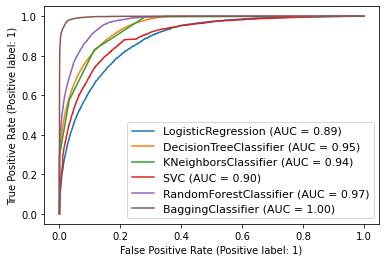

In [259]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

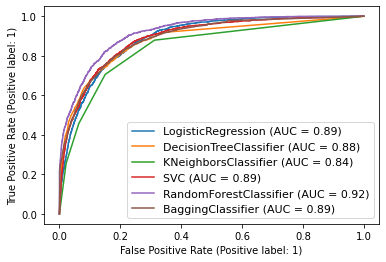

In [261]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
 -----------
SINCE FOR SVC THE AUC IS ALMOST SAME FOR BOTH TRAINING AND TESTING AND THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE ACCURACY SCORE IS THE LOWEST WE WILL CHOOSE "SVC " AS OUR FINAL MODEL <BR>
Precision and and accuracy scores are also good with comparatively low false positives as compared to other models 

    

In [262]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 85.45


CONFUSION MATRIX FOR THE TRAINIG


 [[18623  1187]
 [ 2602  3636]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.88      0.94      0.91     19810
           1       0.75      0.58      0.66      6238

    accuracy                           0.85     26048
   macro avg       0.82      0.76      0.78     26048
weighted avg       0.85      0.85      0.85     26048



Testing SCORE FOR THE SVC() is 84.17


CONFUSION MATRIX FOR THE TESTING


 [[4578  331]
 [ 700  903]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4909
           1       0.73      0.56      0.64      1603

    accuracy                           0.84      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.83      0.84      0.83      6512



SAVING THE MODEL
------------------

In [264]:
import pickle

In [265]:
with open('svc_mod', 'wb') as files:
    pickle.dump(svc, files)

----------------------------------------------------------------------------------------------------------------